<a href="https://colab.research.google.com/github/mtech00/EPAM_Training/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries is generally a good practice as it reduces dependencies between specific cells.

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
import IPython.display as display

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Libraries
import scipy.stats as stats

# Scikit-learn Modules
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    recall_score, f1_score, roc_auc_score, brier_score_loss,
    fbeta_score, roc_curve, precision_recall_curve
)
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report



# Imbalanced-learn Modules
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Ignore Warnings
warnings.filterwarnings("ignore")


I will read the CSV file from my GitHub repository; I think this is better than using Google Drive.

In [ ]:
url = 'https://raw.githubusercontent.com/mtech00/EPAM_DS/refs/heads/main/weatherAUS.csv'

df = pd.read_csv(url)
pd.set_option('display.max_columns', None)

After this point, we will see how big it is.  
What are the features? (Feature as a method of defining data. For example, eye color is a feature for defining humans, where "eye color = featurevalue = brown.")  
What kind of data is this? Is it just simple "yes/no," "1/0," or enormously large numbers with 64-bit floats?  
All of these will provide us with insightful information.

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.head(5).T

0           1           2           3           4
Date           2008-12-01  2008-12-02  2008-12-03  2008-12-04  2008-12-05
Location           Albury      Albury      Albury      Albury      Albury
MinTemp              13.4         7.4        12.9         9.2        17.5
MaxTemp              22.9        25.1        25.7        28.0        32.3
Rainfall              0.6         0.0         0.0         0.0         1.0
Evaporation           NaN         NaN         NaN         NaN         NaN
Sunshine              NaN         NaN         NaN         NaN         NaN
WindGustDir             W         WNW         WSW          NE           W
WindGustSpeed        44.0        44.0        46.0        24.0        41.0
WindDir9am              W         NNW           W          SE         ENE
WindDir3pm            WNW         WSW         WSW           E          NW
WindSpeed9am         20.0         4.0        19.0        11.0         7.0
WindSpeed3pm         24.0        22.0        26.0         9.0        20.0
Humidity9am          71.0        44.0        38.0        45.0        82.0
Humidity3pm          22.0        25.0        30.0        16.0        33.0
Pressure9am        1007.7      1010.6      1007.6      1017.6      1010.8
Pressure3pm        1007.1      1007.8      1008.7      1012.8      1006.0
Cloud9am              8.0         NaN         NaN         NaN         7.0
Cloud3pm              NaN         NaN         2.0         NaN         8.0
Temp9am              16.9        17.2        21.0        18.1        17.8
Temp3pm              21.8        24.3        23.2        26.5        29.7
RainToday              No          No          No          No          No
RainTomorrow           No          No          No          No          No

After observing that we have ordinal and nominal data, we understand what belongs in our ordinal category. Defining eye color might be a simple task (e.g., blue, brown), as the possible scenarios are very limited. However, when trying to define an animal's eye size, the data becomes much more diverse—you cannot count all possible values. This information provides insight into our dataset and how it is distributed or sparse.  

Additionally, adding kurtosis values would be a good practice (though we won't do so here).

In [ ]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

When you look at the numbers, you might notice unusual things. Why do they mention "non-null"? Or why do different columns have different counts?  

This happens because, in the real world, you don’t always have answers to all questions. Sometimes it’s the nature of the data, and sometimes it’s due to life’s challenges. For example, if you want to learn about eye color, what happens if the creature doesn’t have eyes? That’s just the nature of the data.  

Alternatively, real-life challenges such as surveys can lead to missing information. Some people might not want to share their eye color but still provide all other details. For these reasons, we will always encounter missing parts in datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
!pip install seaborn

Above, I mentioned whether the data is normally distributed or not—why is this important?  

In nature, you will often see examples of normal (or Gaussian) distribution. Here, it matters because depending on this, we decide how to handle missing values or apply statistical tools. Many statistical methods assume normal distribution (though I did not use it here, it is generally a better practice).  

Now, we will draw a KDE histogram. Histograms are well-known to many people.  
Why? Is it inherently important for humans? Of course not; they didn’t naturally learn it. However, they can intuitively understand it, which is why histograms are a common practice.  

In our example, we will visually examine the distribution of our data. In the first example, it is very close to a normal distribution.  

There is an extra line on the graphic—what is it? It is closely related to the bars. Why?  
This is the KDE (Kernel Density Estimate). It helps make spotting trends and patterns easier compared to the raw histogram alone, as it estimates probability density.  

Next, side by side, we will add a new visual element: the quartile-to-quartile (Q-Q) plot.  

Using values like 0.25 and 0.75, we gain insight into whether our data is normally distributed or skewed. If the data points closely follow the line, it means the distribution is very close to normal.

In [ ]:


url = "https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg"

display.Image(url=url)


Cloud will be either ordinal or nominal—I couldn’t decide, so let the data type determine it (though this is not a good practice).

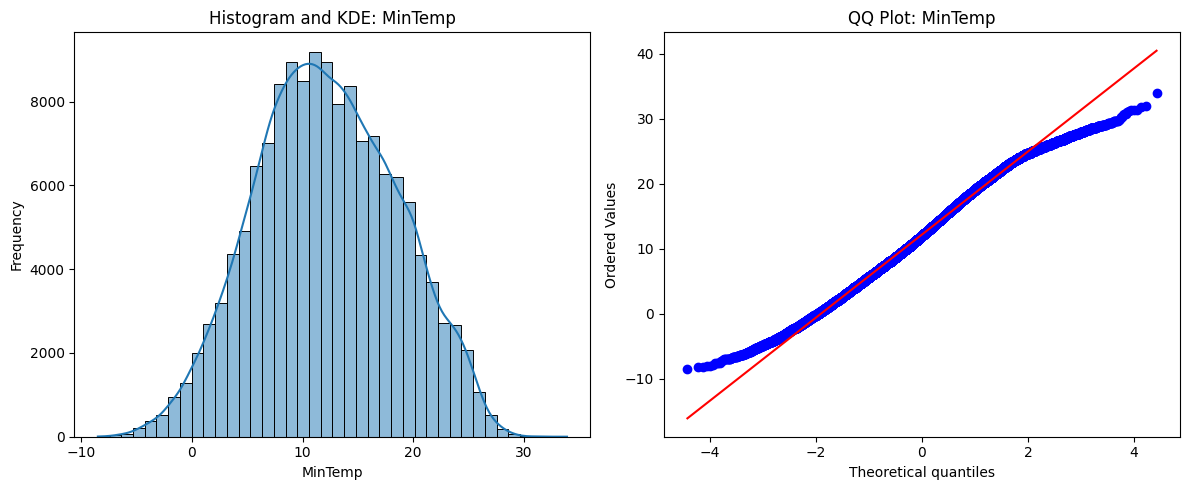

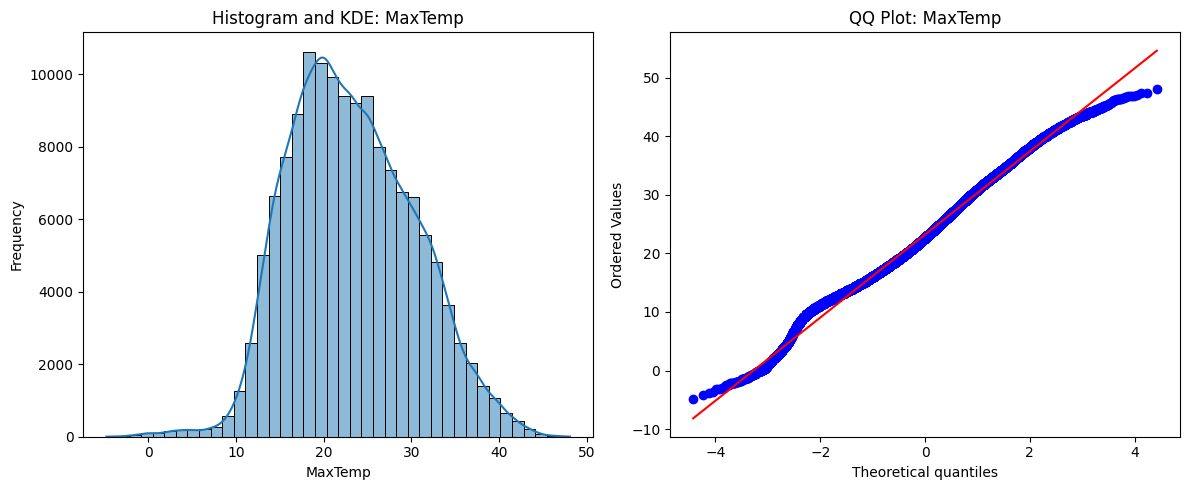

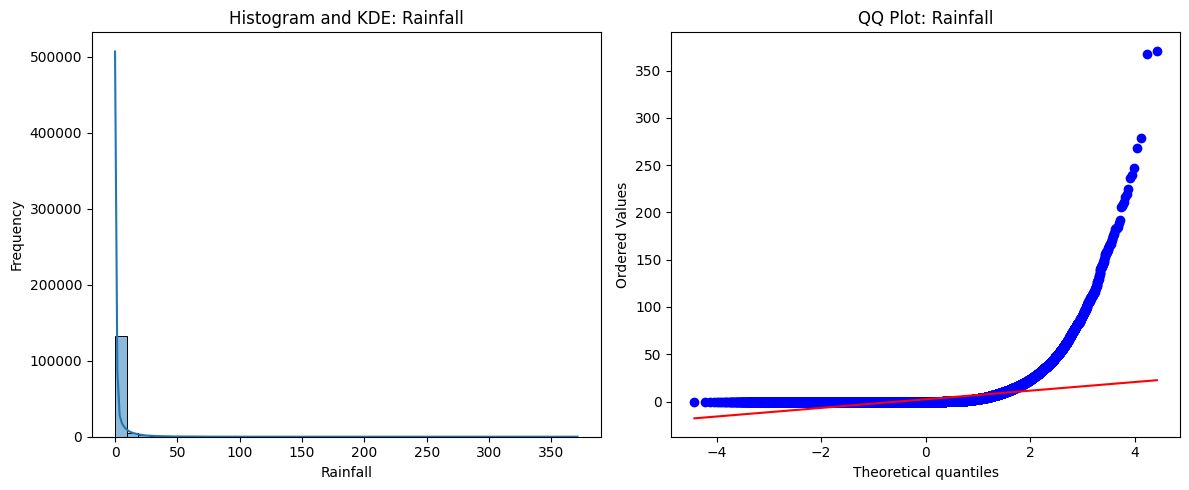

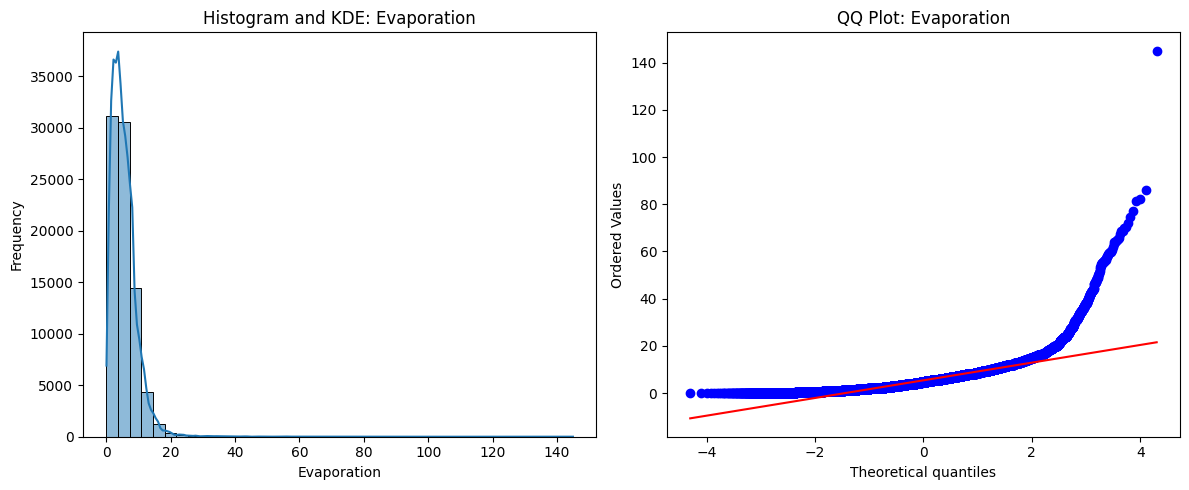

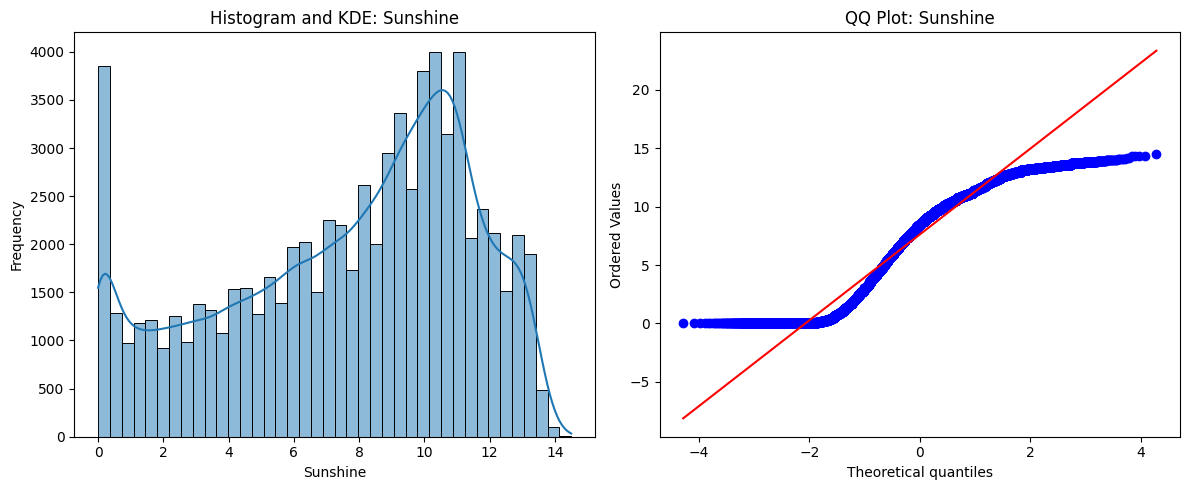

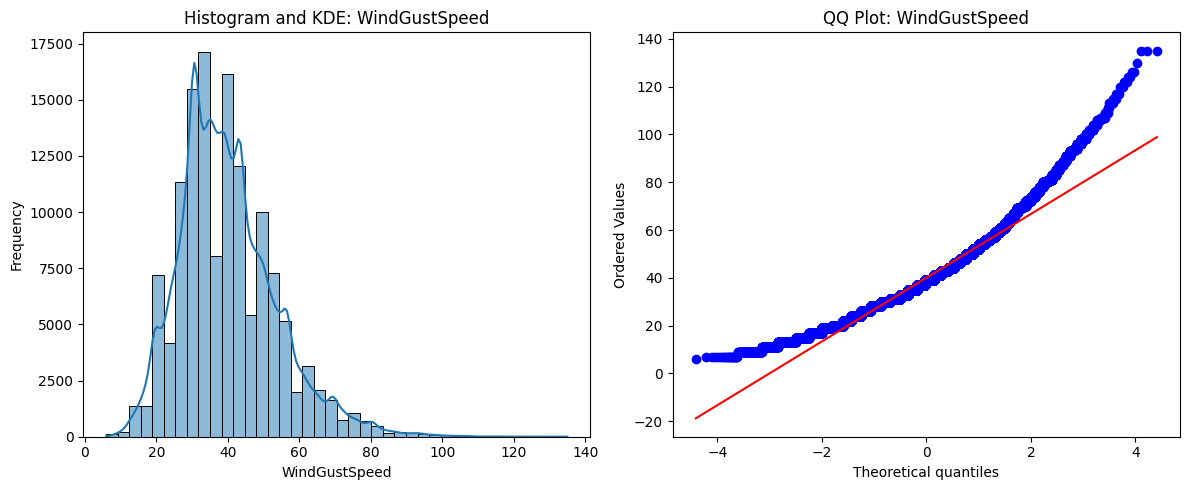

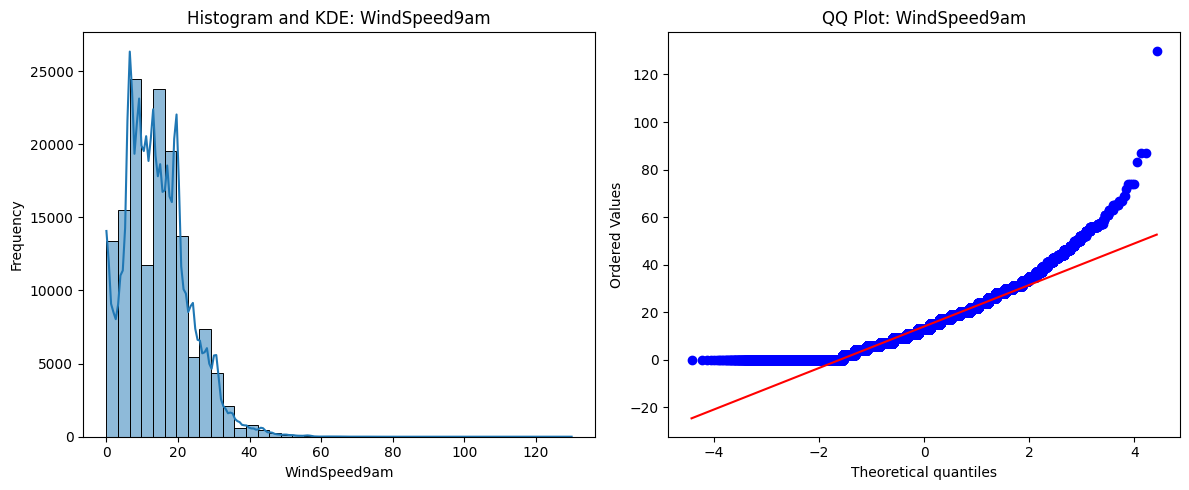

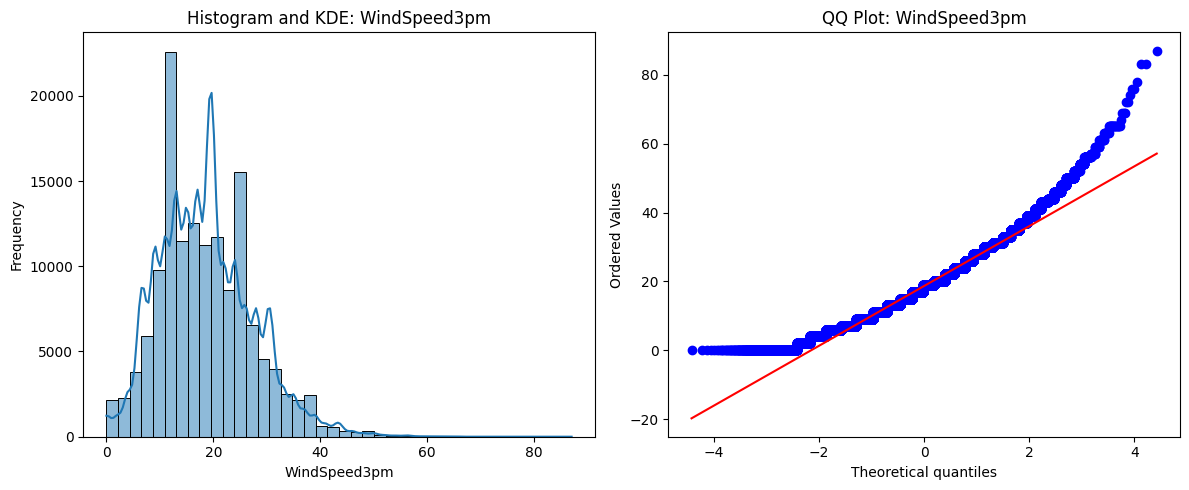

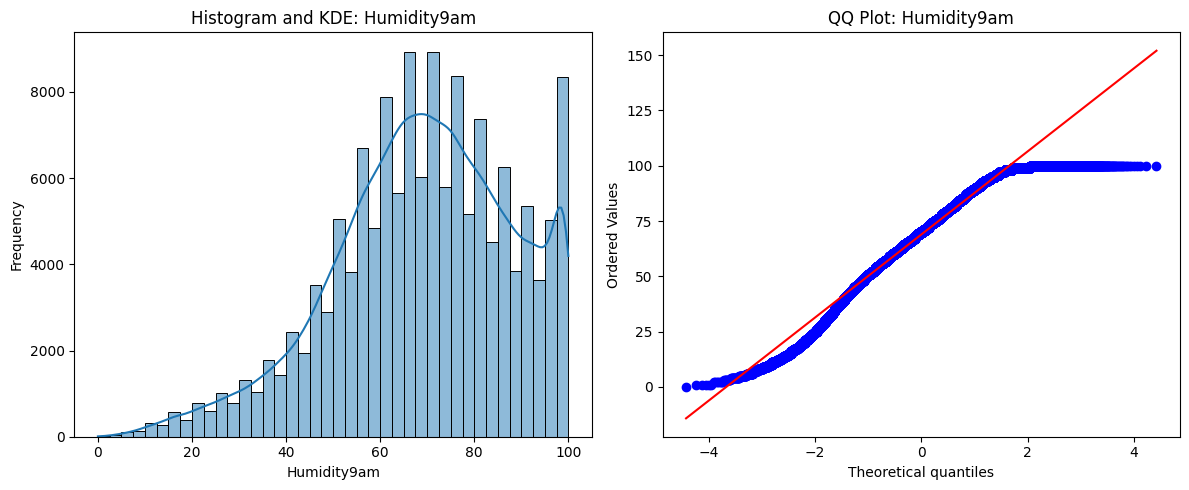

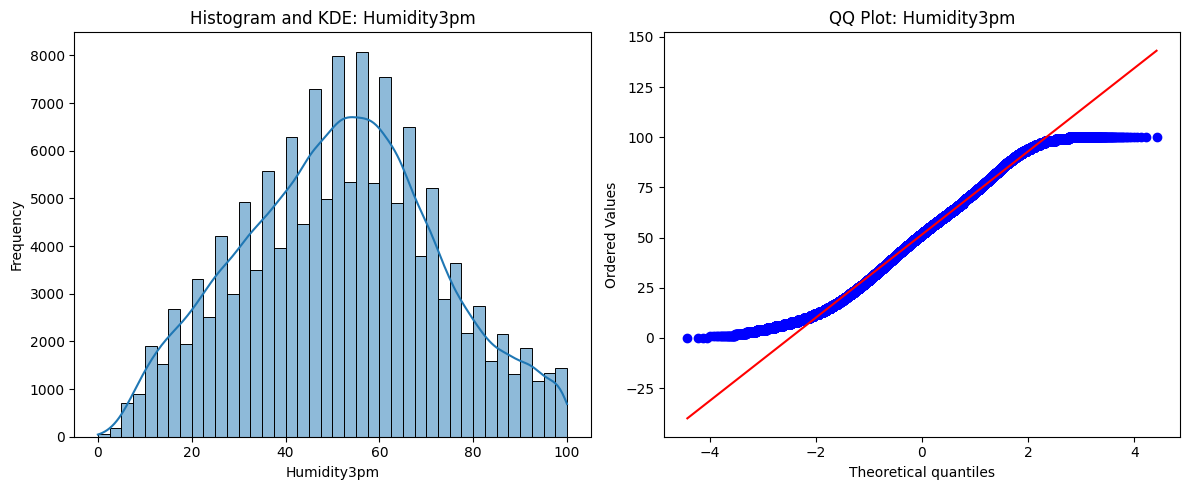

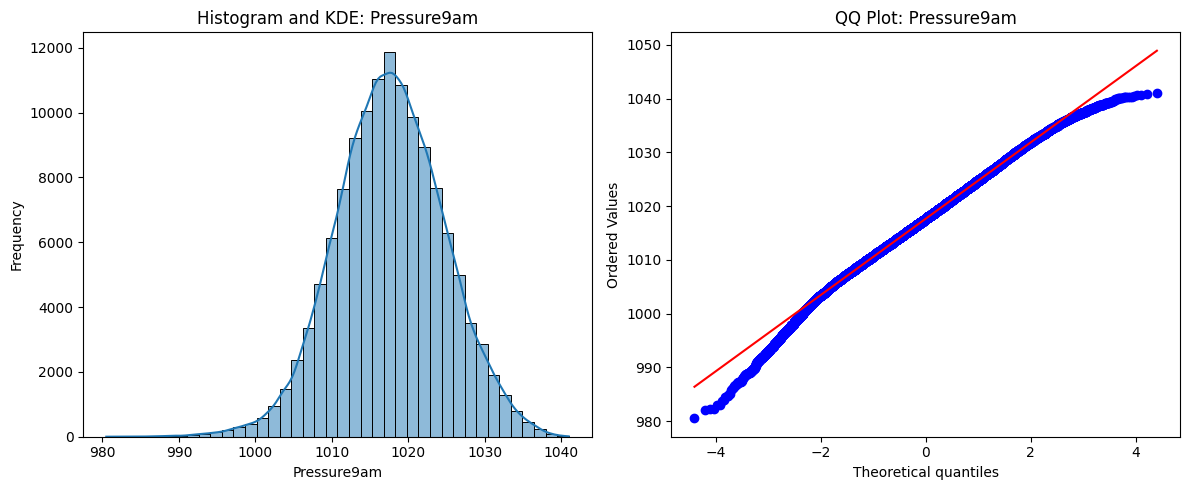

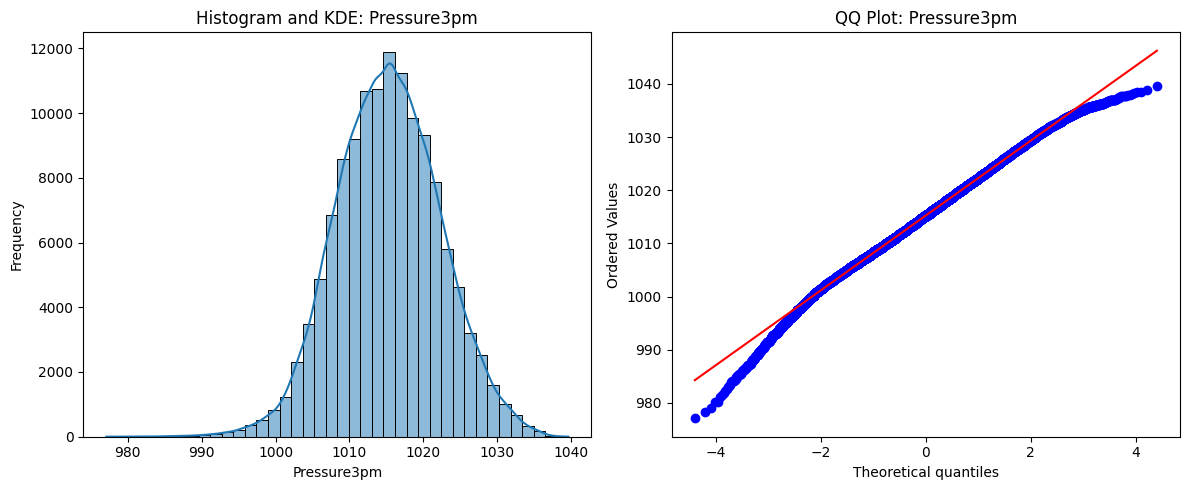

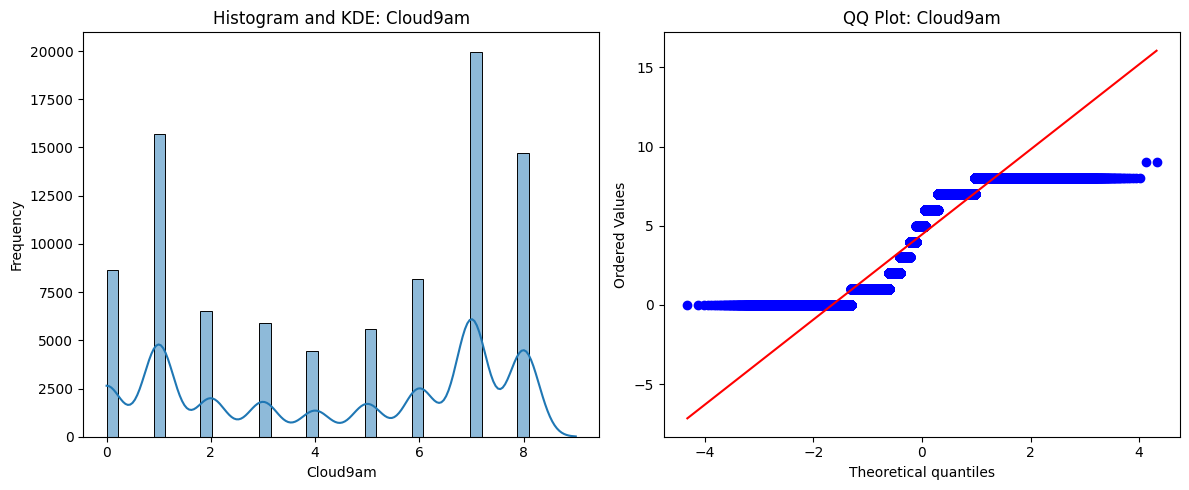

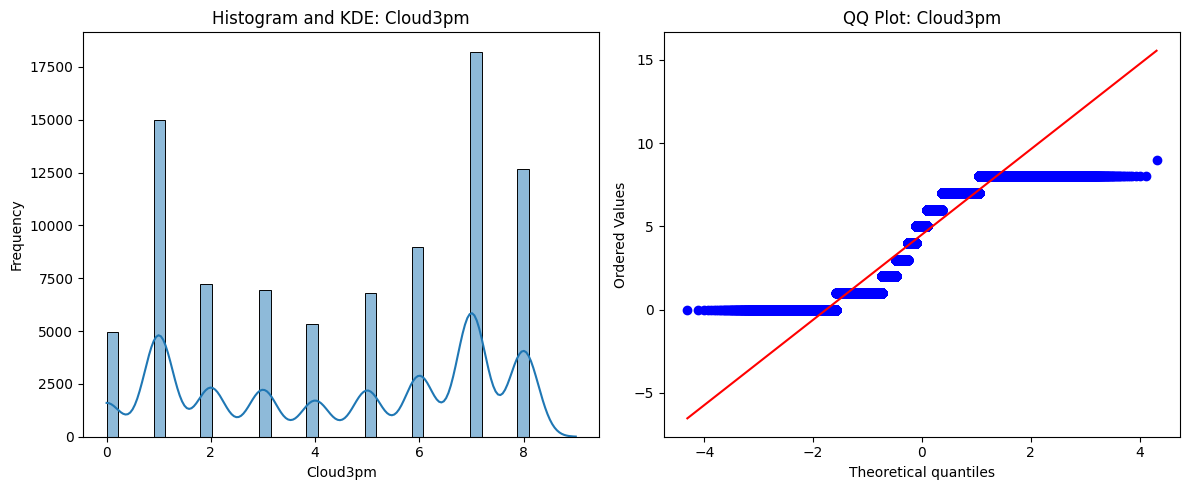

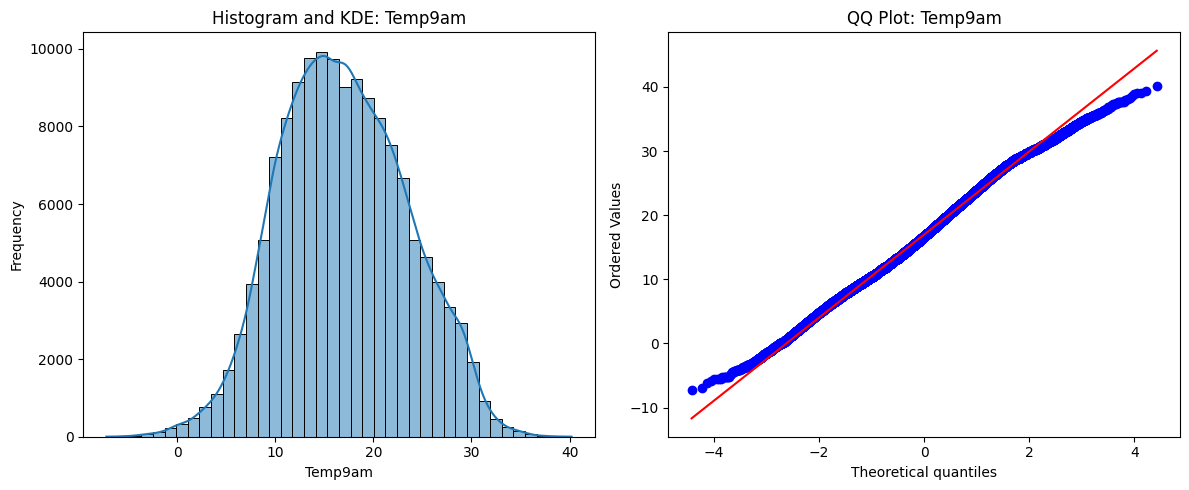

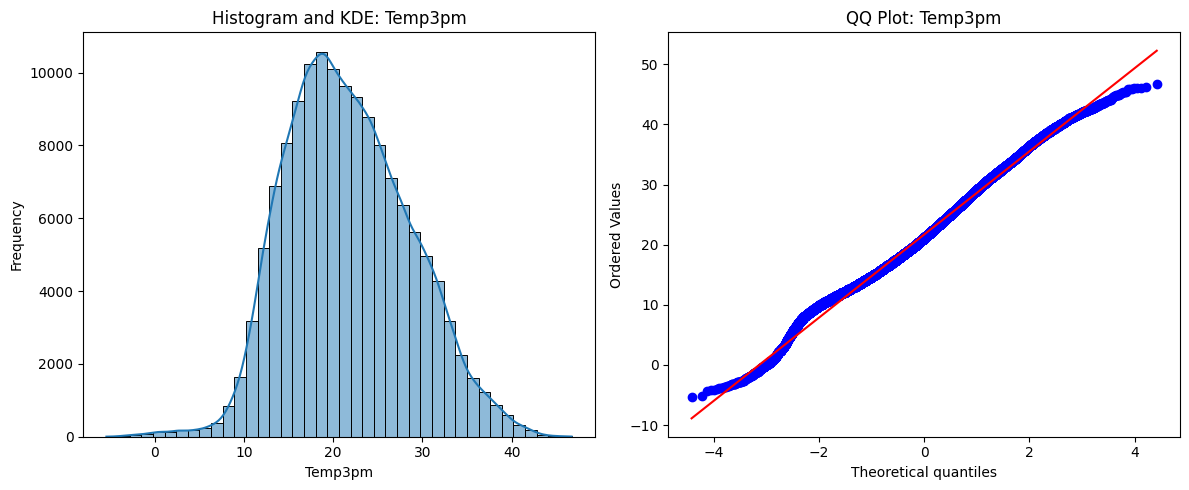

In [ ]:


# Continuous or ordinal columns in our dataset are only of type `float64`.
continuous_cols = df.select_dtypes(include=['float64', 'int']).columns


def plot_histogram_qq(data, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))


    sns.histplot(data[feature_name].dropna(), kde=True, bins=40, ax=axes[0])
    axes[0].set_title(f"Histogram and KDE: {feature_name}")
    axes[0].set_xlabel(feature_name)
    axes[0].set_ylabel("Frequency")


    stats.probplot(data[feature_name].dropna(), dist="norm", plot=axes[1])
    axes[1].get_lines()[1].set_color('red')  # Line of best fit in red
    axes[1].set_title(f"QQ Plot: {feature_name}")

    plt.tight_layout()
    plt.show()

for col in continuous_cols:
    plot_histogram_qq(df, col)


After observing many large numbers and different types of sparsity, we now focus on the more limited nominal data. This part is simpler.  

We will use bar plots here because our data is not continuous—it is sparse.  

The most important point to notice here is the imbalance in the `RainTomorrow` and `RainToday` data.

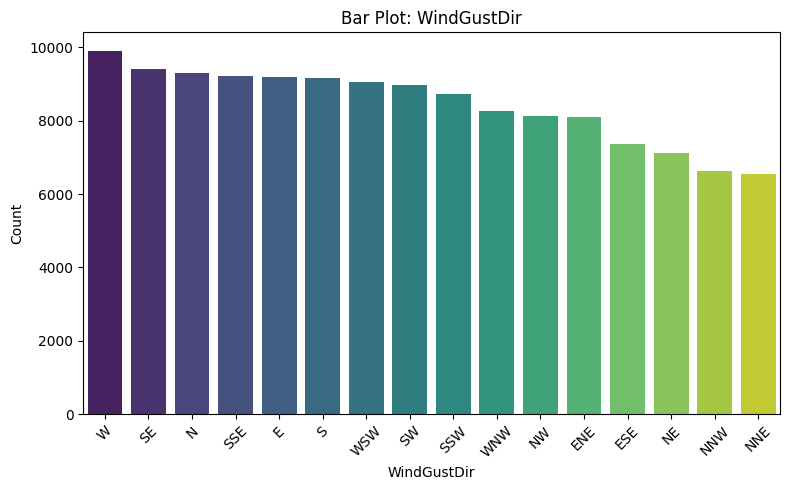

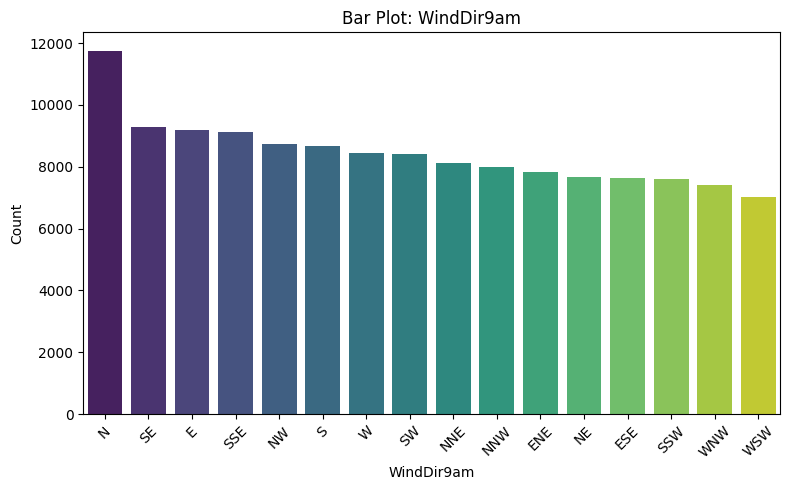

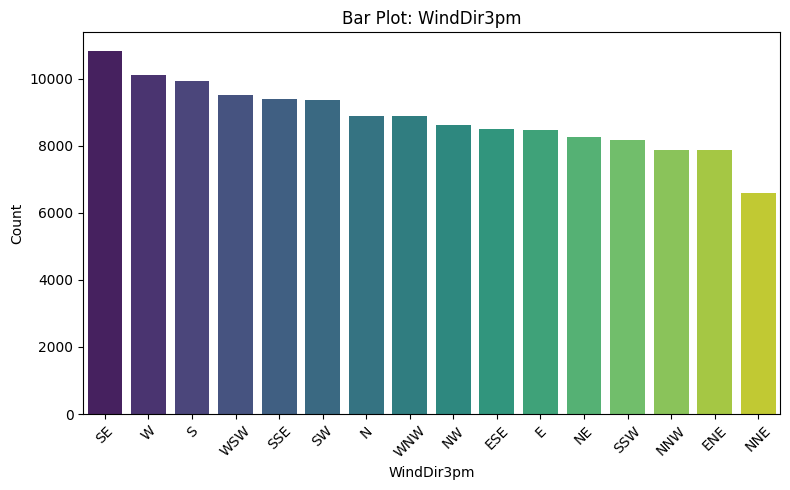

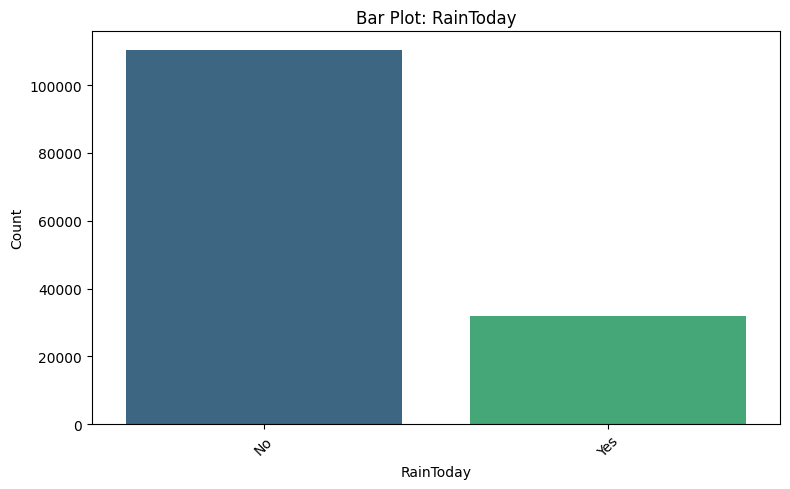

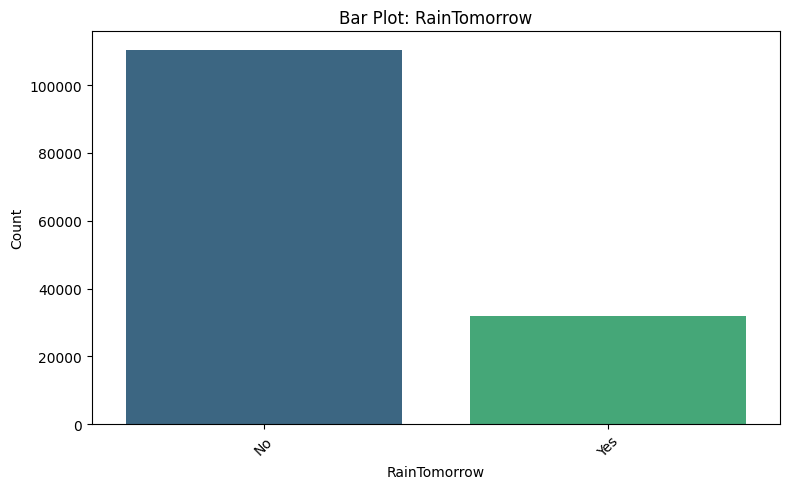

In [ ]:

# Exclude 'Date' and 'Location' columns
excluded_cols = ['Date', 'Location']
categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in excluded_cols]

def plot_bar(data, feature_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=data,
        x=feature_name,
        order=data[feature_name].value_counts().index,
        palette='viridis'
    )
    plt.title(f"Bar Plot: {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for col in categorical_cols:
    plot_bar(df, col)


Here, we will examine the correlation between features to see how they affect each other—whether the relationship is positive, negative, or has no effect.

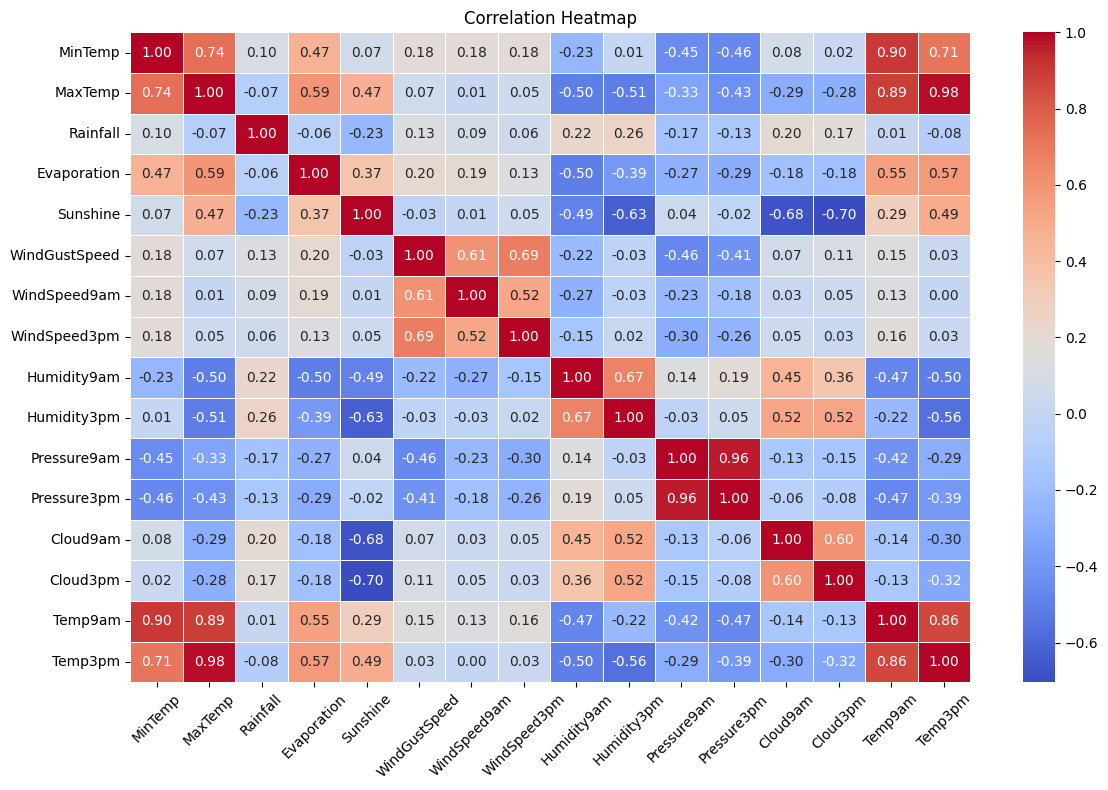

In [ ]:

correlation_matrix = df.select_dtypes(include=['float64', 'int']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True
)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Our target value is determining whether it will rain tomorrow or not.  

Because of this, we want to understand how other data affects this outcome.  

If your target is binary or has small numbers (like 4 or 5 categories), visually proportional bar plots are a good choice for understanding percentages across all data. (In our dataset, this might not represent real life accurately due to unbalanced data—I couldn’t decide.)

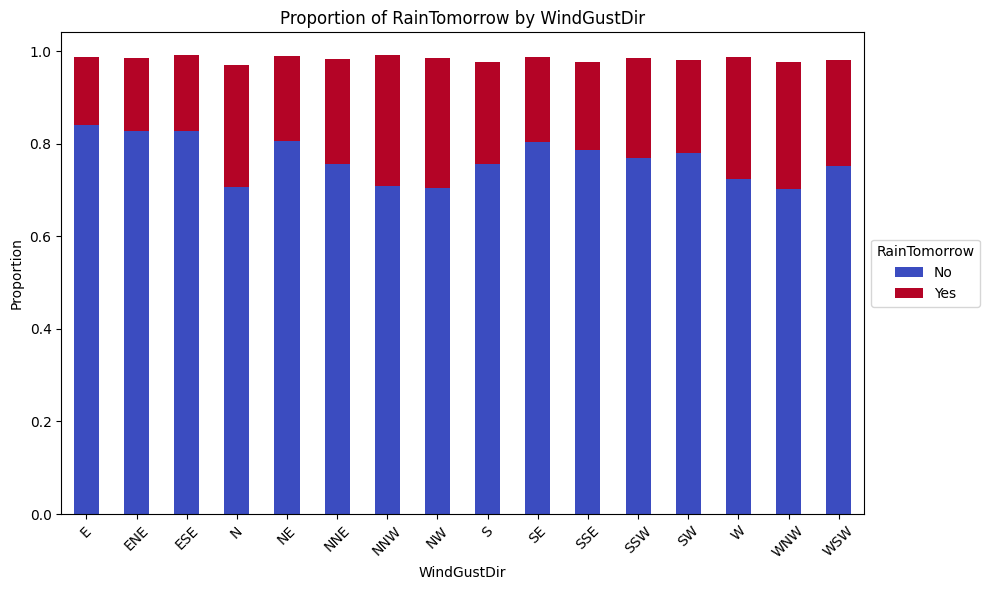

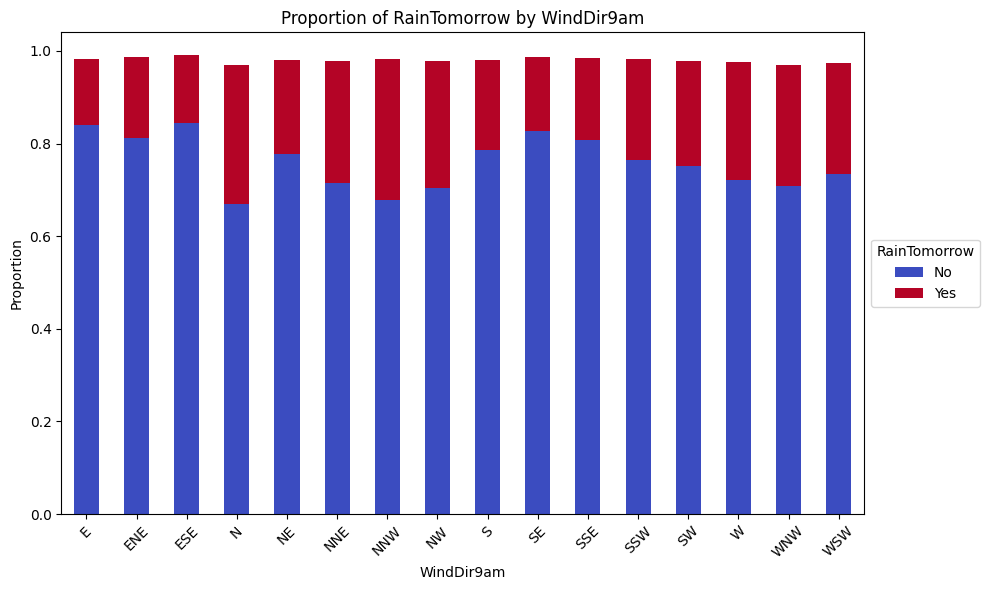

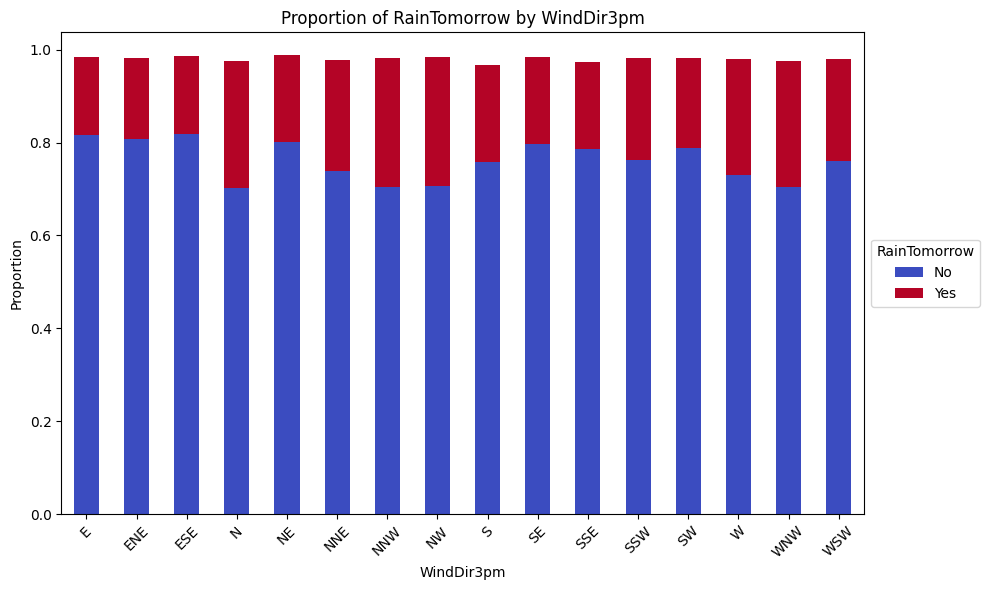

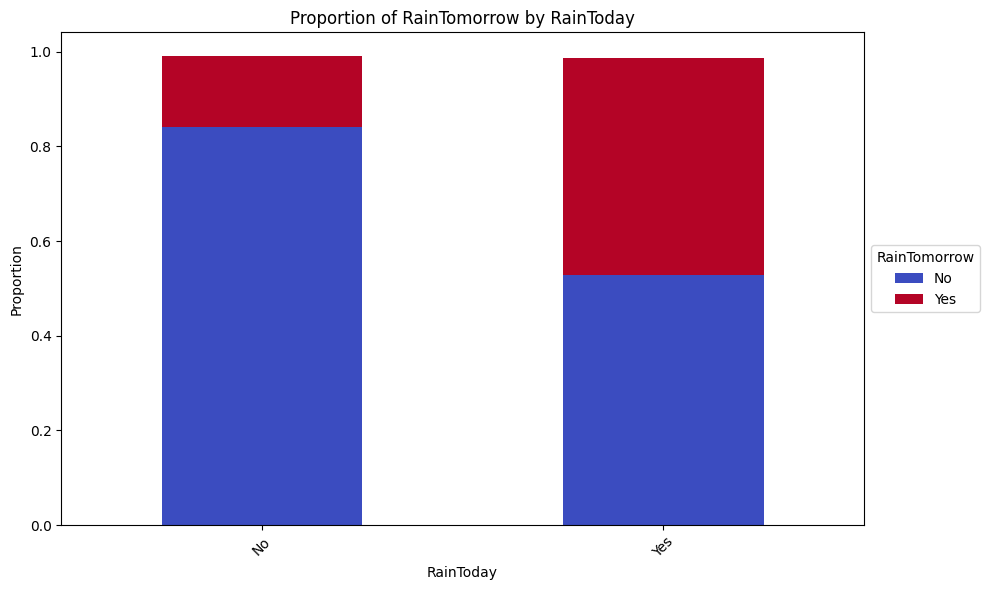

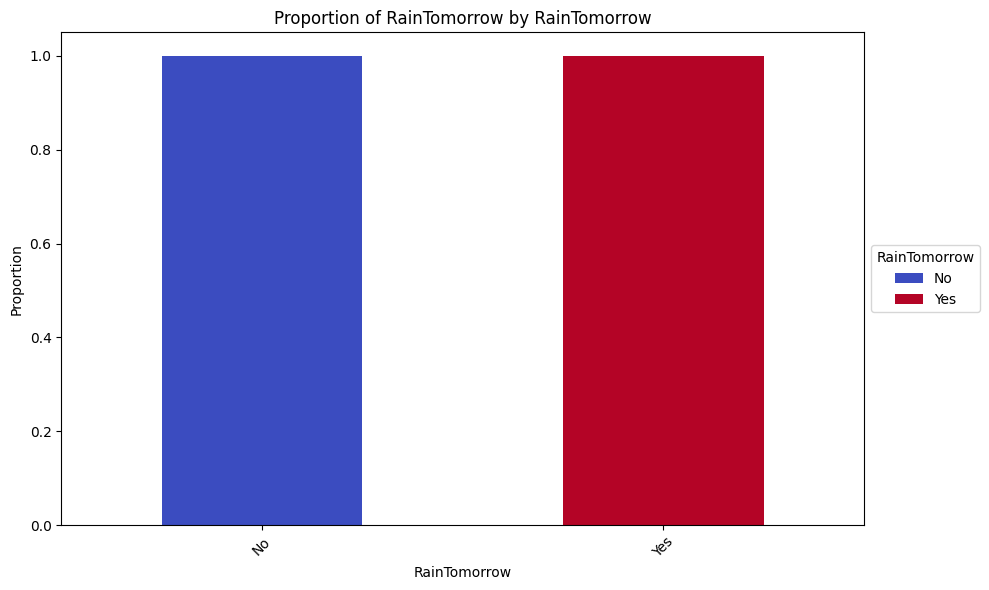

In [ ]:

def plot_proportional_bar(data, feature_name, target):

    proportion_df = (
        data.groupby([feature_name, target]).size() / data.groupby([feature_name]).size()
    ).unstack()


    proportion_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title(f"Proportion of {target} by {feature_name}")
    plt.ylabel("Proportion")
    plt.xlabel(feature_name)
    plt.xticks(rotation=45)
    plt.legend(title=target, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


for col in categorical_cols:
    plot_proportional_bar(df, col, 'RainTomorrow')


Here, we will examine the unique values of our features. Even if they are continuous in real life, they can be categorized into a smaller set of values (since continuous values can take infinite possibilities between two points).

In [ ]:

for var in df:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
MinTemp  contains  390  labels
MaxTemp  contains  506  labels
Rainfall  contains  682  labels
Evaporation  contains  359  labels
Sunshine  contains  146  labels
WindGustDir  contains  17  labels
WindGustSpeed  contains  68  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
WindSpeed9am  contains  44  labels
WindSpeed3pm  contains  45  labels
Humidity9am  contains  102  labels
Humidity3pm  contains  102  labels
Pressure9am  contains  547  labels
Pressure3pm  contains  550  labels
Cloud9am  contains  11  labels
Cloud3pm  contains  11  labels
Temp9am  contains  442  labels
Temp3pm  contains  503  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


We will examine the proportion of missing values. For some features, the missing values make up a significant portion. If these features are not crucial for our data, dropping them is a better option.  

I will drop some of them.

In [ ]:
(df.isna().sum().sort_values(ascending = False)) / len(df)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

In [ ]:
df_cat = df.select_dtypes(include = ['object'])
(df_cat.isna().sum().sort_values(ascending = False)) / len(df)

WindDir9am      0.072639
WindGustDir     0.070989
WindDir3pm      0.029066
RainTomorrow    0.022460
RainToday       0.022419
Date            0.000000
Location        0.000000
dtype: float64

In [ ]:
df.drop(columns=['Sunshine', 'Evaporation', 'Cloud9am','Cloud3pm'], inplace=True)


We dropped data with a large proportion of missing values. However, if the data is crucial, we can impute it using more advanced methods like KNN imputer (a machine learning method for predicting missing values instead of classical statistical methods).  

Classical methods are generally simpler and often sufficient. But if you need more advanced techniques, the KNN imputer can be helpful.Remember, KNN is computationally much more expensive.

In [ ]:
'''from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)


df['Cloud3pm'] = imputer.fit_transform(df[['Cloud3pm']])
'''

"from sklearn.impute import KNNImputer\n\n\nimputer = KNNImputer(n_neighbors=5)\n\n\ndf['Cloud3pm'] = imputer.fit_transform(df[['Cloud3pm']])\n"

In [ ]:
#optional
'''For Sunshine and Evaporation, use the mean or median imputation:
python
Kodu kopyala
rain['Sunshine'].fillna(rain['Sunshine'].median(), inplace=True)
rain['Evaporation'].fillna(rain['Evaporation'].median(), inplace=True)
For Cloud3pm and Cloud9am, use mode if categorical or median if numeric:
python
Kodu kopyala
rain['Cloud3pm'].fillna(rain['Cloud3pm'].median(), inplace=True)
rain['Cloud9am'].fillna(rain['Cloud9am'].median(), inplace=True)
'''

"For Sunshine and Evaporation, use the mean or median imputation:\npython\nKodu kopyala\nrain['Sunshine'].fillna(rain['Sunshine'].median(), inplace=True)\nrain['Evaporation'].fillna(rain['Evaporation'].median(), inplace=True)\nFor Cloud3pm and Cloud9am, use mode if categorical or median if numeric:\npython\nKodu kopyala\nrain['Cloud3pm'].fillna(rain['Cloud3pm'].median(), inplace=True)\nrain['Cloud9am'].fillna(rain['Cloud9am'].median(), inplace=True)\n"

Here, we are imputing missing values in nominal data.  

The simplest and most effective method is using the mode of the data.  
(Considering central tendency, outliers, etc., is important. There are also many advanced methods for this, but I didn’t want to spend too much time here.)  

Additionally, we manually defined the categorical columns because the `Date` and `Location` columns could cause issues, and I couldn't figure them out completely.

In [ ]:
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

(df_num.isna().sum().sort_values(ascending = False)) / len(df)

Pressure9am      0.103568
Pressure3pm      0.103314
WindGustSpeed    0.070555
Humidity3pm      0.030984
Temp3pm          0.024811
Rainfall         0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
WindSpeed9am     0.012148
Temp9am          0.012148
MinTemp          0.010209
MaxTemp          0.008669
dtype: float64

The process is the same as for categorical data, except instead of using the mode, we use the median.  

This is because we don’t want to alter the characteristic of our data and prefer to preserve its central tendency. Additionally, our data contains outliers.  

Outliers are anomalies in the data—some might arise from poor data collection, survey issues, or the nature of electrical sensors that occasionally peak up or down. These outliers are not part of the original nature of the data, so we don’t want to deal with them in this step.

In [ ]:
continuous_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm',
     'Temp9am', 'Temp3pm'
]
for col in continuous_cols:
    df[col] = df[col].fillna(df[col].median())


We added year and month data to capture seasonal or yearly trends in our data.  

The same season in different years might not make sense to the algorithm. However, by including this information, it becomes meaningful.

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.head()


Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  Year  \
0       1007.7       1007.1     16.9     21.8        No           No  2008   
1       1010.6       1007.8     17.2     24.3        No           No  2008   
2       1007.6       1008.7     21.0     23.2        No           No  2008   
3       1017.6       1012.8     18.1     26.5        No           No  2008   
4       1010.8       1006.0     17.8     29.7        No           No  2008   

   Month  
0     12  
1     12  
2     12  
3     12  
4     12

In [ ]:
(df.isnull().sum()/len(df))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Year             0.0
Month            0.0
dtype: float64

In [ ]:


url = "https://cdn.prod.website-files.com/601ca16f9dfe00cc7bb4027c/638520ee036310b8c58fa620_seasonality_blog_imgs_beige.003.jpeg"

display.Image(url=url)


We added `year` and `month` data to capture seasonal or yearly trends in our dataset.  

The same season but in different years might not make sense for the algorithm. However, by adding these features, it becomes meaningful.  

Additionally, we included the range of some values (e.g., HPA changes) as they might indicate rain prediction. (Although I don’t have domain knowledge, changes in HPA often signal weather events.)

In [ ]:
def create_features(df):
    df = df.copy()


    df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12)


    df['Season'] = pd.cut(df['Month'],
                         bins=[0, 3, 6, 9, 12],
                         labels=['Summer', 'Autumn', 'Winter', 'Spring'])

    df['Temp_Range'] = df['MaxTemp'] - df['MinTemp']


    df['Humidity_Range'] = df['Humidity9am'] - df['Humidity3pm']


    df['Pressure_Range'] = df['Pressure9am'] - df['Pressure3pm']

    return df
df = create_features(df)

Here, we will decode our data because values like "blue eye" or "brown eye" are meaningless mathematically to algorithms. However, converting them to `1` or `0` makes them understandable.  

But now we face another problem: Is `1` greater than `0`? Is "blue" greater than "brown"? Of course not. To avoid this issue, we use the one-hot encoding method for nominal categories.  

If you have domain knowledge, features like wind direction might be considered ordinal. However, for simplicity, treating it as nominal is a better choice in this case.

In [ ]:


def encode_categorical_variables(df):

    df = df.copy()

    target = 'RainTomorrow'

    categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
                         'RainToday', 'Season']


    rain_today_map = {'No': 0, 'Yes': 1}
    df['RainToday'] = df['RainToday'].map(rain_today_map)

    df_encoded = pd.get_dummies(df,
                              columns=categorical_columns,
                              prefix=categorical_columns,
                              prefix_sep='_',
                              dtype=int)

    le = LabelEncoder()
    df_encoded[target] = le.fit_transform(df[target])


    cols = list(df_encoded.columns)
    cols.remove(target)
    cols.sort()
    cols.append(target)
    df_encoded = df_encoded[cols]

    return df_encoded, le



In [ ]:
df_encoded, label_encoder = encode_categorical_variables(df)

After encoding, our feature columns increased from 27 to 124.  

However, this also reduced the data type complexity.

In [ ]:
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")

Original shape: (145460, 27)
Encoded shape: (145460, 124)


In [ ]:
df_encoded

Date  Humidity3pm  Humidity9am  Humidity_Range  \
0      2008-12-01         22.0         71.0            49.0   
1      2008-12-02         25.0         44.0            19.0   
2      2008-12-03         30.0         38.0             8.0   
3      2008-12-04         16.0         45.0            29.0   
4      2008-12-05         33.0         82.0            49.0   
...           ...          ...          ...             ...   
145455 2017-06-21         24.0         51.0            27.0   
145456 2017-06-22         21.0         56.0            35.0   
145457 2017-06-23         24.0         53.0            29.0   
145458 2017-06-24         24.0         51.0            27.0   
145459 2017-06-25         36.0         62.0            26.0   

        Location_Adelaide  Location_Albany  Location_Albury  \
0                       0                0                1   
1                       0                0                1   
2                       0                0                1   
3                       0                0                1   
4                       0                0                1   
...                   ...              ...              ...   
145455                  0                0                0   
145456                  0                0                0   
145457                  0                0                0   
145458                  0                0                0   
145459                  0                0                0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                           0                       0                  0   
1                           0                       0                  0   
2                           0                       0                  0   
3                           0                       0                  0   
4                           0                       0                  0   
...                       ...                     ...                ...   
145455                      0                       0                  0   
145456                      0                       0                  0   
145457                      0                       0                  0   
145458                      0                       0                  0   
145459                      0                       0                  0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                      0                  0                0   
1                      0                  0                0   
2                      0                  0                0   
3                      0                  0                0   
4                      0                  0                0   
...                  ...                ...              ...   
145455                 0                  0                0   
145456                 0                  0                0   
145457                 0                  0                0   
145458                 0                  0                0   
145459                 0                  0                0   

        Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                       0               0                      0   
1                       0               0                      0   
2                       0               0                      0   
3                       0               0                      0   
4                       0               0                      0   
...                   ...             ...                    ...   
145455                  0               0                      0   
145456                  0               0                      0   
145457                  0               0                      0   
145458                  0               0                      0   
145459                  0               0                      0   



We dropped the `Date` and `Month` values because we added their cyclical representations for better representation.  

This helps avoid adding unnecessary noise to the data.

In [ ]:
df_encoded = df_encoded.drop(columns=['Date'])

In [ ]:
df_encoded = df_encoded.drop(columns=['Month'])

In [ ]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                        'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
                        'Month_sin', 'Month_cos', 'Temp_Range', 'Humidity_Range',
                        'Pressure_Range']

In [ ]:
df_encoded

Humidity3pm  Humidity9am  Humidity_Range  Location_Adelaide  \
0              22.0         71.0            49.0                  0   
1              25.0         44.0            19.0                  0   
2              30.0         38.0             8.0                  0   
3              16.0         45.0            29.0                  0   
4              33.0         82.0            49.0                  0   
...             ...          ...             ...                ...   
145455         24.0         51.0            27.0                  0   
145456         21.0         56.0            35.0                  0   
145457         24.0         53.0            29.0                  0   
145458         24.0         51.0            27.0                  0   
145459         36.0         62.0            26.0                  0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                     0                1                      0   
1                     0                1                      0   
2                     0                1                      0   
3                     0                1                      0   
4                     0                1                      0   
...                 ...              ...                    ...   
145455                0                0                      0   
145456                0                0                      0   
145457                0                0                      0   
145458                0                0                      0   
145459                0                0                      0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                            0                  0                 0   
1                            0                  0                 0   
2                            0                  0                 0   
3                            0                  0                 0   
4                            0                  0                 0   
...                        ...                ...               ...   
145455                       0                  0                 0   
145456                       0                  0                 0   
145457                       0                  0                 0   
145458                       0                  0                 0   
145459                       0                  0                 0   

        Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                       0                0                  0               0   
1                       0                0                  0               0   
2                       0                0                  0               0   
3                       0                0                  0               0   
4                       0                0                  0               0   
...                   ...              ...                ...             ...   
145455                  0                0                  0               0   
145456                  0                0                  0               0   
145457                  0                0                  0               0   
145458                  0                0                  0               0   
145459                  0                0                  0               0   

        Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                           0                  0                0   
1                           0                  0                0   
2                           0                  0                0   
3                           0                  0                0   
4                           0                  0                0   
...                       ...                ...              ...   
145455                      0            

For example, some categories have values like `0, 1, 2`, while others have extremely large numbers like `1e+9`. For algorithms, this is computationally inefficient. We aim to understand trends or categories, not exact numerical values, as in linear regression. Therefore, we need to scale the values to bring them to a comparable range.  

As mentioned earlier, we don’t want to remove outliers completely because they can represent important trends. Instead, we choose a scaling method that accommodates these outliers.  

There are many scaling methods, but since our dataset has outliers, I prefer using the **RobustScaler**.

In [ ]:


def apply_robust_scaling(df):

    df = df.copy()


    scaler = RobustScaler()

    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df, scaler



The scaler value is important because, if we want to revert to the original data, it will be necessary.

In [ ]:
df_scaled, scaler = apply_robust_scaling(df_encoded)

In [ ]:
df_scaled


Humidity3pm  Humidity9am  Humidity_Range  Location_Adelaide  \
0         -1.071429     0.038462        1.454545                  0   
1         -0.964286    -1.000000        0.090909                  0   
2         -0.785714    -1.230769       -0.409091                  0   
3         -1.285714    -0.961538        0.545455                  0   
4         -0.678571     0.461538        1.454545                  0   
...             ...          ...             ...                ...   
145455    -1.000000    -0.730769        0.454545                  0   
145456    -1.107143    -0.538462        0.818182                  0   
145457    -1.000000    -0.653846        0.545455                  0   
145458    -1.000000    -0.730769        0.454545                  0   
145459    -0.571429    -0.307692        0.409091                  0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                     0                1                      0   
1                     0                1                      0   
2                     0                1                      0   
3                     0                1                      0   
4                     0                1                      0   
...                 ...              ...                    ...   
145455                0                0                      0   
145456                0                0                      0   
145457                0                0                      0   
145458                0                0                      0   
145459                0                0                      0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                            0                  0                 0   
1                            0                  0                 0   
2                            0                  0                 0   
3                            0                  0                 0   
4                            0                  0                 0   
...                        ...                ...               ...   
145455                       0                  0                 0   
145456                       0                  0                 0   
145457                       0                  0                 0   
145458                       0                  0                 0   
145459                       0                  0                 0   

        Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                       0                0                  0               0   
1                       0                0                  0               0   
2                       0                0                  0               0   
3                       0                0                  0               0   
4                       0                0                  0               0   
...                   ...              ...                ...             ...   
145455                  0                0                  0               0   
145456                  0                0                  0               0   
145457                  0                0                  0               0   
145458                  0                0                  0               0   
145459                  0                0                  0               0   

        Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                           0                  0                0   
1                           0                  0                0   
2                           0                  0                0   
3                           0                  0                0   
4                           0                  0                0   
...                       ...                ...              ...   
145455                      0            

In [ ]:
df_scaled[numerical_columns].describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        0.021105       0.060388       3.846650       0.064146   
std         0.699536       0.694937      13.982952       0.874729   
min        -2.252747      -2.686275       0.000000      -2.200000   
25%        -0.472527      -0.450980       0.000000      -0.533333   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.527473       0.549020       1.000000       0.466667   
max         2.406593       2.500000     618.333333       6.400000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        0.085896      -0.030022      -0.042260      -0.015950   
std         0.738483       0.792429       0.725206       0.731119   
min        -1.083333      -1.727273      -2.692308      -1.857143   
25%        -0.500000      -0.545455      -0.500000      -0.535714   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.500000       0.454545       0.500000       0.464286   
max         9.750000       6.181818       1.153846       1.714286   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        0.005394       0.006038       0.031207       0.059886   
std         0.810661       0.802891       0.701011       0.721122   
min        -4.469880      -4.590361      -2.597826      -2.789474   
25%        -0.493976      -0.493976      -0.478261      -0.463158   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.506024       0.506024       0.521739       0.536842   
max         2.819277       2.939759       2.554348       2.694737   

           Month_sin      Month_cos     Temp_Range  Humidity_Range  \
count  145460.000000  145460.000000  145460.000000   145460.000000   
mean        0.011584      -0.011973       0.072765        0.015812   
std         0.705267       0.518778       0.688663        0.740834   
min        -1.000000      -0.732051      -3.500000       -4.909091   
25%        -0.500000      -0.633975      -0.458333       -0.500000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         0.500000       0.366025       0.541667        0.500000   
max         1.000000       0.732051       2.902778        3.363636   

       Pressure_Range  
count   145460.000000  
mean        -0.002674  
std          0.951512  
min        -11.350000  
25%         -0.450000  
50%          0.000000  
75%          0.550000  
max         12.050000

In [ ]:
df_scaled

Humidity3pm  Humidity9am  Humidity_Range  Location_Adelaide  \
0         -1.071429     0.038462        1.454545                  0   
1         -0.964286    -1.000000        0.090909                  0   
2         -0.785714    -1.230769       -0.409091                  0   
3         -1.285714    -0.961538        0.545455                  0   
4         -0.678571     0.461538        1.454545                  0   
...             ...          ...             ...                ...   
145455    -1.000000    -0.730769        0.454545                  0   
145456    -1.107143    -0.538462        0.818182                  0   
145457    -1.000000    -0.653846        0.545455                  0   
145458    -1.000000    -0.730769        0.454545                  0   
145459    -0.571429    -0.307692        0.409091                  0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                     0                1                      0   
1                     0                1                      0   
2                     0                1                      0   
3                     0                1                      0   
4                     0                1                      0   
...                 ...              ...                    ...   
145455                0                0                      0   
145456                0                0                      0   
145457                0                0                      0   
145458                0                0                      0   
145459                0                0                      0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                            0                  0                 0   
1                            0                  0                 0   
2                            0                  0                 0   
3                            0                  0                 0   
4                            0                  0                 0   
...                        ...                ...               ...   
145455                       0                  0                 0   
145456                       0                  0                 0   
145457                       0                  0                 0   
145458                       0                  0                 0   
145459                       0                  0                 0   

        Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                       0                0                  0               0   
1                       0                0                  0               0   
2                       0                0                  0               0   
3                       0                0                  0               0   
4                       0                0                  0               0   
...                   ...              ...                ...             ...   
145455                  0                0                  0               0   
145456                  0                0                  0               0   
145457                  0                0                  0               0   
145458                  0                0                  0               0   
145459                  0                0                  0               0   

        Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                           0                  0                0   
1                           0                  0                0   
2                           0                  0                0   
3                           0                  0                0   
4                           0                  0                0   
...                       ...                ...              ...   
145455                      0            

Here, we will split our data, but why?  

Our goal is to predict `RainTomorrow`. If we give the algorithm all the data, how can we evaluate whether it works or not?  

For this reason, we split our data into training and testing sets. An 80/20 split is a well-known standard, but some special datasets might require different proportions.  

Additionally, cross-validation is a better practice, such as a 60/20/20 split. This allows us to better generalize our model and improve its performance.

In [ ]:



X = df_scaled.drop(columns=['RainTomorrow'])
y = df_scaled['RainTomorrow']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 116368 samples
Test set size: 29092 samples


In [ ]:
df_scaled

Humidity3pm  Humidity9am  Humidity_Range  Location_Adelaide  \
0         -1.071429     0.038462        1.454545                  0   
1         -0.964286    -1.000000        0.090909                  0   
2         -0.785714    -1.230769       -0.409091                  0   
3         -1.285714    -0.961538        0.545455                  0   
4         -0.678571     0.461538        1.454545                  0   
...             ...          ...             ...                ...   
145455    -1.000000    -0.730769        0.454545                  0   
145456    -1.107143    -0.538462        0.818182                  0   
145457    -1.000000    -0.653846        0.545455                  0   
145458    -1.000000    -0.730769        0.454545                  0   
145459    -0.571429    -0.307692        0.409091                  0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                     0                1                      0   
1                     0                1                      0   
2                     0                1                      0   
3                     0                1                      0   
4                     0                1                      0   
...                 ...              ...                    ...   
145455                0                0                      0   
145456                0                0                      0   
145457                0                0                      0   
145458                0                0                      0   
145459                0                0                      0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                            0                  0                 0   
1                            0                  0                 0   
2                            0                  0                 0   
3                            0                  0                 0   
4                            0                  0                 0   
...                        ...                ...               ...   
145455                       0                  0                 0   
145456                       0                  0                 0   
145457                       0                  0                 0   
145458                       0                  0                 0   
145459                       0                  0                 0   

        Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                       0                0                  0               0   
1                       0                0                  0               0   
2                       0                0                  0               0   
3                       0                0                  0               0   
4                       0                0                  0               0   
...                   ...              ...                ...             ...   
145455                  0                0                  0               0   
145456                  0                0                  0               0   
145457                  0                0                  0               0   
145458                  0                0                  0               0   
145459                  0                0                  0               0   

        Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                           0                  0                0   
1                           0                  0                0   
2                           0                  0                0   
3                           0                  0                0   
4                           0                  0                0   
...                       ...                ...              ...   
145455                      0            

Why did I choose recall?  

In this scenario, we assume we are trying to predict whether it will rain today for human daily activities. If we predict rain and it doesn’t rain, it’s not too bad. However, if we predict no rain and it rains, that’s terrible. Therefore, **false negatives** are more critical in this case.  

But this depends on specific scenarios:  
- For a farmer, **false positives** might be more important. If you predict rain but there’s no rain, it’s bad for the crops.  

Why did I choose F1, Fβ, and F2?  
- F2 values give more weight to recall, which is crucial in scenarios where false negatives matter more.  
- F1 is useful for comparing performance when precision and recall are equally important or for reference against similar F2 values.  

Why ROC-AUC curve?  
- The ROC-AUC curve helps determine if the model is making statistically random predictions or if it can effectively distinguish between rain and no rain.  

I added the Brier score because it is a more general metric for evaluating models. As I read, it provides an overview of prediction quality, but I couldn’t fully figure it out yet.

In [ ]:

def plot_roc_curve(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.3f})')

def evaluate_model(y_true, y_pred, y_prob):
    metrics = {
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'f2': fbeta_score(y_true, y_pred, beta=2),
        'roc_auc': roc_auc_score(y_true, y_prob),
        'brier': brier_score_loss(y_true, y_prob)
    }
    return metrics




In this part, we are defining our models with different hyperparameters to understand the effects of various settings.  

I used the grid search approach to explore these hyperparameters.  

For logistic regression, I added an optimal threshold for deciding whether a value belongs to category X or not. (This is important for all classification models.)  

For example:  
- Model A predicts "brown eye" with a probability of 0.6.  
- Model B predicts "brown eye" with a probability of 0.95.  

From a classification perspective, both are treated equally. However, when considering probabilities, Model B is more robust.  

We can further improve our models through probability calibration, but I did not implement that here.

I defined this function because we will run it multiple times.

In [ ]:
def run_all_models(X_train, X_test, y_train, y_test):
    feature_names = X_train.columns.tolist()

    results, optimal_threshold = train_logistic_regression(X_train, X_test, y_train, y_test, feature_names=feature_names)

    print("Logistic Regression Results:")
    for C, metrics in results.items():
        print(f"C={C}: {metrics}")

    print("\nKNN Results for different K values:")
    knn_results = train_knn_models(X_train, X_test,
                                   y_train, y_test)
    for k, metrics in knn_results.items():
        print(f"K={k}: {metrics}")
    print("\nNaive Bayes Results:")
    nb_results = train_naive_bayes(X_train, X_test,
                                   y_train, y_test)
    for vs, metrics in nb_results.items():
        print(f"var_smoothing={vs}: {metrics}")
    print("\nSVM Results for different C values:")
    svm_results = train_svm_models(X_train, X_test,
                                   y_train, y_test)
    for C, metrics in svm_results.items():
        print(f"C={C}: {metrics}")


In [ ]:

def train_knn_models(X_train, X_test, y_train, y_test):
    k_values = [3, 6, 12, 24]
    results = {}
    plt.figure(figsize=(10, 6))
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[k] = evaluate_model(y_test, y_pred, y_prob)
        plot_roc_curve(y_test, y_prob, f'K={k}')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - KNN')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results


Here, we are observing the KNN results.  

For lower K values, the ROC-AUC curve results are not as good because the model struggles to generalize well. However, recall improves with lower K values.  

Despite this, the ROC-AUC curve for low K values is still acceptable. For this reason, we will choose **K = 3**.  

**Additional note:** This version of the dataset is unbalanced, and KNN is sensitive to unbalanced data. Because of this, the metrics are relatively low.


KNN Results for different K values:


  File "C:\Users\ma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


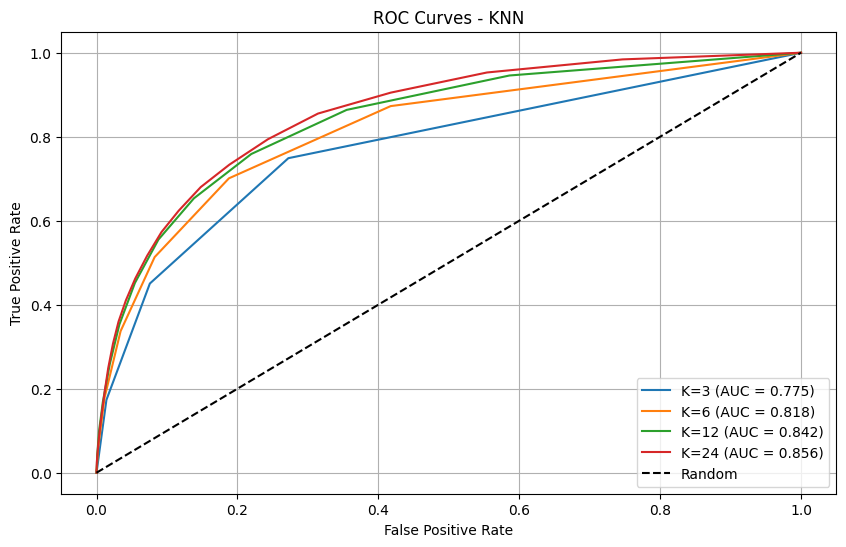

K=3: {'recall': 0.4504672897196262, 'f1': 0.52443557892828, 'f2': 0.47740103667998285, 'roc_auc': 0.7746681958560602, 'brier': 0.14082145530653714}
K=6: {'recall': 0.3370716510903427, 'f1': 0.4624425686504968, 'f2': 0.3780705125965268, 'roc_auc': 0.8177004943311854, 'brier': 0.12526353178422475}
K=12: {'recall': 0.35311526479750777, 'f1': 0.4811120543293718, 'f2': 0.3951680379305536, 'roc_auc': 0.8423581683364222, 'brier': 0.11919681050155065}
K=24: {'recall': 0.3598130841121495, 'f1': 0.48945862909206483, 'f2': 0.4024530471444998, 'roc_auc': 0.8557133856080044, 'brier': 0.1175168550536994}


In [ ]:
    print("\nKNN Results for different K values:")
    knn_results = train_knn_models(X_train, X_test,
                                   y_train, y_test)
    for k, metrics in knn_results.items():
        print(f"K={k}: {metrics}")

In [ ]:
def train_naive_bayes(X_train, X_test, y_train, y_test):
    smoothing_values = [1e-12, 1e-6, 1e-3, 1e-1]
    results = {}
    plt.figure(figsize=(10, 6))
    for vs in smoothing_values:
        model = GaussianNB(var_smoothing=vs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[vs] = evaluate_model(y_test, y_pred, y_prob)
        plot_roc_curve(y_test, y_prob, f'vs={vs}')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Naive Bayes')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results


Now, let's look at Naive Bayes.  

**Important points about Naive Bayes:**  
1. It is not applicable for values with `0` due to the Bayes theorem.  
2. It assumes features are independent variables, which is often unrealistic in the real world (e.g., the butterfly effect is a perfect example of how features can influence each other).  

**On multivariate analysis:**  
I need to review this in more detail for better understanding.  

**Type of Naive Bayes used:**  
I used Gaussian Naive Bayes, which is suitable for continuous values.  

**Hyperparameter note:**  
The `var_smoothing` parameter acts like a regularization parameter like smoothing the probability .  

**Results and trade-offs:**  
For the ROC-AUC curve and recall, we need to make a trade-off.  
- For balancing recall and the ROC-AUC curve, `0.7` is a reasonable threshold—we don't want to go below this value.  
- For stricter thresholds like `0.01`, it performs well, but there seems to be an even better trade-off point between `1e-06` and `0.01`.  

Here, we will make a hypothetical decision for demonstration purposes.


Naive Bayes Results:


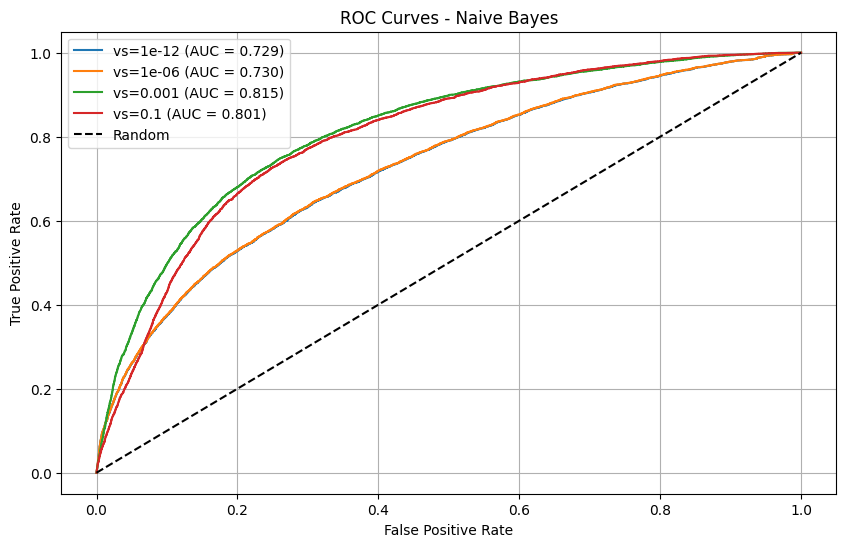

var_smoothing=1e-12: {'recall': 0.6919003115264798, 'f1': 0.4612668743509865, 'f2': 0.5765835929387332, 'roc_auc': 0.7293493683179548, 'brier': 0.32701529095379317}
var_smoothing=1e-06: {'recall': 0.6911214953271028, 'f1': 0.46238015839933305, 'f2': 0.5769530843649225, 'roc_auc': 0.7303757623275009, 'brier': 0.32472104575463323}
var_smoothing=0.001: {'recall': 0.48520249221183803, 'f1': 0.5317060681061705, 'f2': 0.5027923943571037, 'roc_auc': 0.8148946502692055, 'brier': 0.15080377178481694}
var_smoothing=0.1: {'recall': 0.1205607476635514, 'f1': 0.2021415513188822, 'f2': 0.14376996805111822, 'roc_auc': 0.8010664546769644, 'brier': 0.17108043649250523}


In [ ]:
    print("\nNaive Bayes Results:")
    nb_results = train_naive_bayes(X_train, X_test,
                                   y_train, y_test)
    for vs, metrics in nb_results.items():
        print(f"var_smoothing={vs}: {metrics}")

In [ ]:

def train_svm_models(X_train, X_test, y_train, y_test):
    C_values = [0.001, 0.01, 0.1, 1]
    results = {}
    plt.figure(figsize=(10, 6))
    for C in C_values:
        model = SVC(kernel='linear', C=C, probability=True,
                    random_state=42, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[C] = evaluate_model(y_test, y_pred, y_prob)
        plot_roc_curve(y_test, y_prob, f'C={C}')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - SVM')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

For SVM models, two well-known hyperparameters are **gamma** and **C** (regularization parameter).  
- Note: Gamma is not available for linear kernels.  

**Kernel selection and challenges:**  
Trying different kernels like RBF, polynomial, etc., with varying gamma values would be a good practice. However, SVMs are computationally intensive. For this reason, I couldn't test them extensively.  

**Workarounds:**  
Dimensionality reduction, sampling, or adjusting max iterations could help. I attempted these, but they still took too much time. Ultimately, I decided to proceed only with the linear kernel.  

**Observations on ROC-AUC curve:**  
The initial ROC-AUC curve looks noticeably different from other models. Why?  
I'm not entirely sure, but it’s likely due to the nature of SVMs. SVMs are non-parametric algorithms that aim to find the best margin—not just a single line (a highway and pedestrian pathway is a good analogy).  

**High bias vs. high variance in SVMs:**  
This trade-off is critical in SVM models.  

**Results:**  
In this case, we observed low AUC values, worse than random (0.5).  
- **All results are poor** for me: A recall of `0.99` but an ROC of `0.57` seems unrealistic and indicates a poorly performing model.

In [ ]:
url = "https://www.researchgate.net/publication/332777280/figure/fig2/AS:753584035602432@1556679843419/A-linear-Support-Vector-Machine-SVM-case.png"


display.Image(url=url)


SVM Results for different C values:


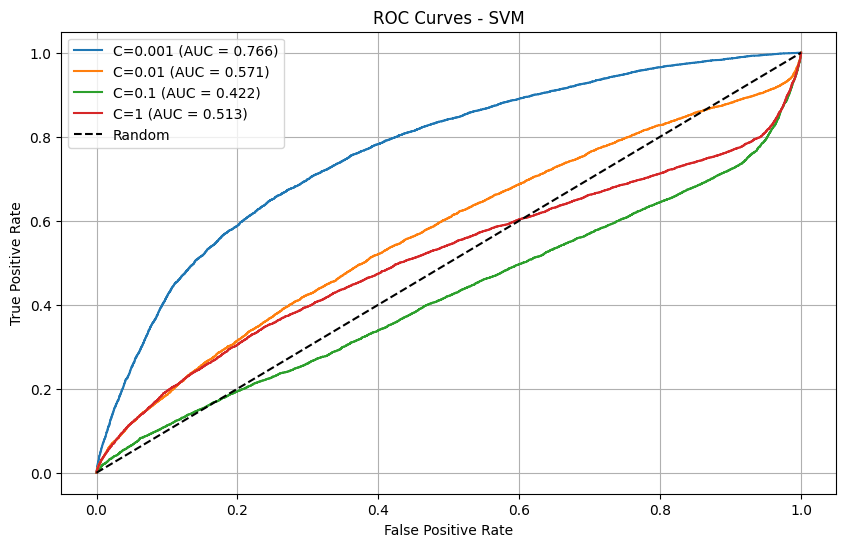

C=0.001: {'recall': 0.04813084112149533, 'f1': 0.09019264448336252, 'f2': 0.05916819852941176, 'roc_auc': 0.7656607736057706, 'brier': 0.25843586097716137}
C=0.01: {'recall': 0.9998442367601246, 'f1': 0.3615217819830475, 'f2': 0.5859852841832357, 'roc_auc': 0.5710590155257587, 'brier': 0.17572185439174254}
C=0.1: {'recall': 0.9886292834890966, 'f1': 0.35837497529714013, 'f2': 0.580366123516395, 'roc_auc': 0.4221251541693324, 'brier': 0.17291087954137455}
C=1: {'recall': 0.7981308411214953, 'f1': 0.3116314429071005, 'f2': 0.4913222744270783, 'roc_auc': 0.5130660501542242, 'brier': 0.20068797624939985}


In [ ]:
    print("\nSVM Results for different C values:")
    svm_results = train_svm_models(X_train, X_test,
                                   y_train, y_test)
    for C, metrics in svm_results.items():
        print(f"C={C}: {metrics}")

In [ ]:


def plot_top_features(model, feature_names, top_n=10):
    coefficients = model.coef_[0]
    importance = np.abs(coefficients)
    sorted_idx = np.argsort(importance)[::-1]
    top_features = sorted_idx[:top_n]

    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n), importance[top_features], tick_label=np.array(feature_names)[top_features])
    plt.title('Top 10 Features (Logistic Regression Coefficients)')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

def threshold_analysis(y_true, y_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"Optimal Threshold: {optimal_threshold:.3f}")

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
    plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold={optimal_threshold:.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Threshold Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()
    return optimal_threshold

def train_logistic_regression(X_train, X_test, y_train, y_test, feature_names):
    C_values = [1e-9, 1e-6, 1e-4, 1e-1]
    results = {}
    plt.figure(figsize=(10, 6))
    best_model = None
    best_auc = -1
    for C in C_values:
        model = LogisticRegression(C=C, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[C] = evaluate_model(y_test, y_pred, y_prob)
        plot_roc_curve(y_test, y_prob, f'C={C}')

        if results[C]['roc_auc'] > best_auc:
            best_auc = results[C]['roc_auc']
            best_model = model

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Plotting Top Features...")
    plot_top_features(best_model, feature_names)

    print("Performing Threshold Analysis...")
    optimal_threshold = threshold_analysis(y_test, best_model.predict_proba(X_test)[:, 1])

    return results, optimal_threshold



In [ ]:
url = "https://www.saedsayad.com/images/LogReg_1.png"


display.Image(url=url)

Now we are analyzing logistic regression.  

**Key differences:**  
Logistic regression is simpler than other models because it uses the sigmoid probability function. Due to this, some features influence the model more than others. Understanding which features are more valuable is helpful (possibly similar to dimensionality reduction).  

**Hyperparameter `C`:**  
A higher `C` value improves the AUC score, but finding the sweet spot is crucial to avoid overfitting and excessive computational resource usage.  
- A `C` value of **0.1** is a good trade-off; anything higher isn’t necessary as the AUC doesn’t improve significantly.  
- The recall, however, at **0.45** is unacceptable.  

**Threshold analysis:**  
Logistic regression uses the sigmoid probability function, which defaults to:  
- Values > 0.5 → `1`  
- Values ≤ 0.5 → `0`  

Is this good?  
It depends on the scenario. For us, **false negatives** are more costly, so the default threshold might not work.  

**Optimal threshold:**  
We need to balance all variables to find the sweet spot. In this case, thresholds around **0.29–0.3** work better for us.

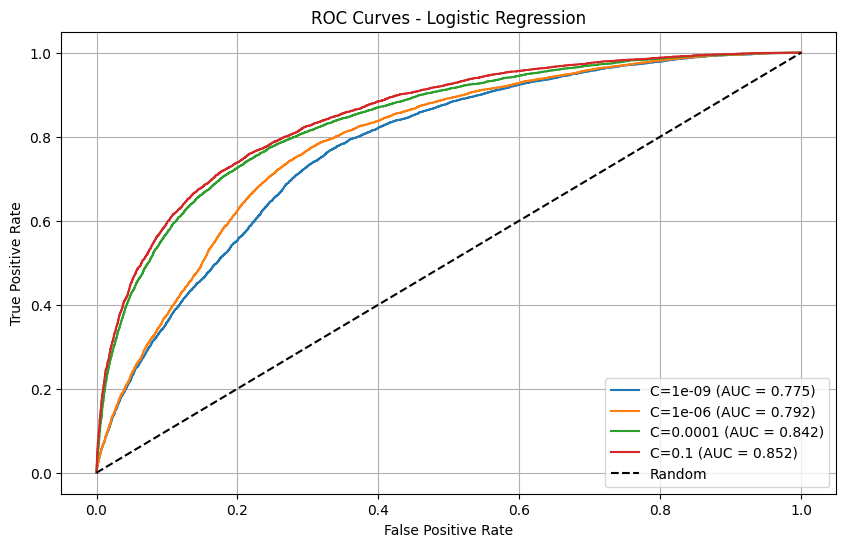

Plotting Top Features...


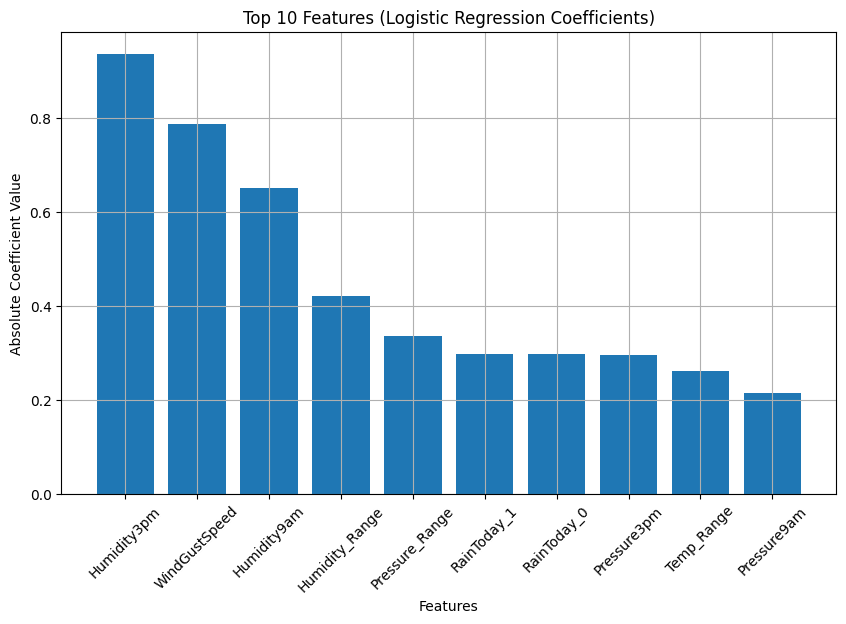

Performing Threshold Analysis...
Optimal Threshold: 0.299


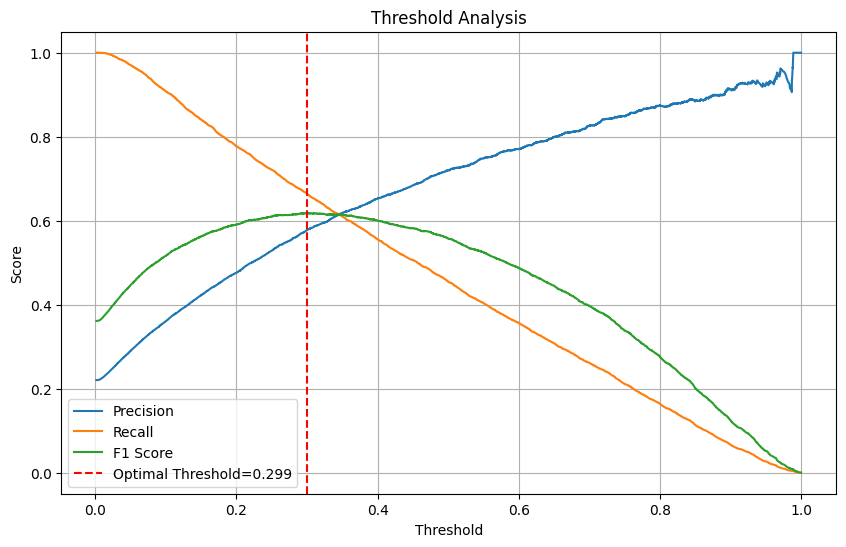

Logistic Regression Results:
C=1e-09: {'recall': 0.0, 'f1': 0.0, 'f2': 0.0, 'roc_auc': 0.7752970507763979, 'brier': 0.1719089952636145}
C=1e-06: {'recall': 0.057165109034267914, 'f1': 0.10564191134139321, 'f2': 0.07001678876678877, 'roc_auc': 0.7916914203255089, 'brier': 0.1598662321329323}
C=0.0001: {'recall': 0.2809968847352025, 'f1': 0.41404636217580904, 'f2': 0.3224422678201187, 'roc_auc': 0.8417026944732081, 'brier': 0.12437255728882855}
C=0.1: {'recall': 0.4546728971962617, 'f1': 0.557326968973747, 'f2': 0.49083571548680005, 'roc_auc': 0.8522086199618781, 'brier': 0.11582329270985627}


In [ ]:
feature_names = X_train.columns.tolist()

# Train and evaluate the model
results, optimal_threshold = train_logistic_regression(X_train, X_test, y_train, y_test, feature_names=feature_names)

# Print results
print("Logistic Regression Results:")
for C, metrics in results.items():
    print(f"C={C}: {metrics}")


In [ ]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Since we have unbalanced data, we need to address this issue, as it can cause biases in the models.  

**Methods to tackle unbalanced data:**  
1. **Reducing the larger class:** If you have a sufficiently large dataset, reducing the larger class is not a problem.  
2. **Oversampling the smaller class:** If your dataset is not large, oversampling the smaller class becomes necessary.  

**On oversampling:**  
There are many methods for oversampling, ranging from advanced machine learning techniques to simpler approaches.  

We created oversampled and undersampled versions of our dataset to address this imbalance.

In [ ]:



def apply_under_sampling(X, y):
    sampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

X_undersampled, y_undersampled = apply_under_sampling(X_train, y_train)


### Conclusion about undersampled versions:

**Logistic Regression:**  
- Reduced bias and improved recall, which is crucial for us—this is a good sign.  
- The ROC-AUC curve follows a similar trend to the original data.

**KNN:**  
- Recall improved, especially for higher `K` values, where the gain is more noticeable.  
- High `K` values provide better generalization, making the model perform better than on the unbalanced dataset.

**Naive Bayes:**  
- Achieved good recall and overall smoother ROC-AUC curves.  
- However, I cannot decide where the acceptable smoothness lies.

**SVM:**  
- Recall remains interesting, but the **Brier score** and **AUC score** indicate that the model is unreliable without good class separation.  
- These metrics suggest the model is essentially useless for this scenario.

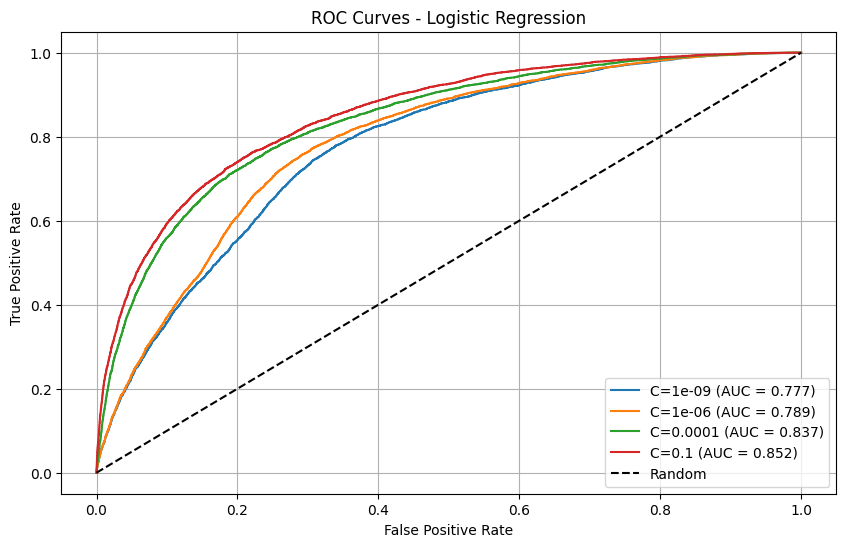

Plotting Top Features...


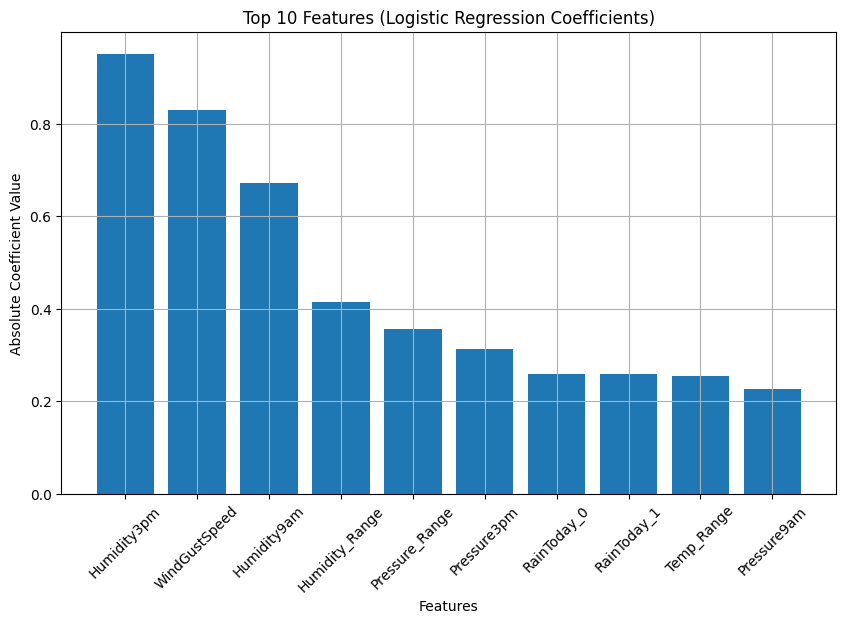

Performing Threshold Analysis...
Optimal Threshold: 0.603


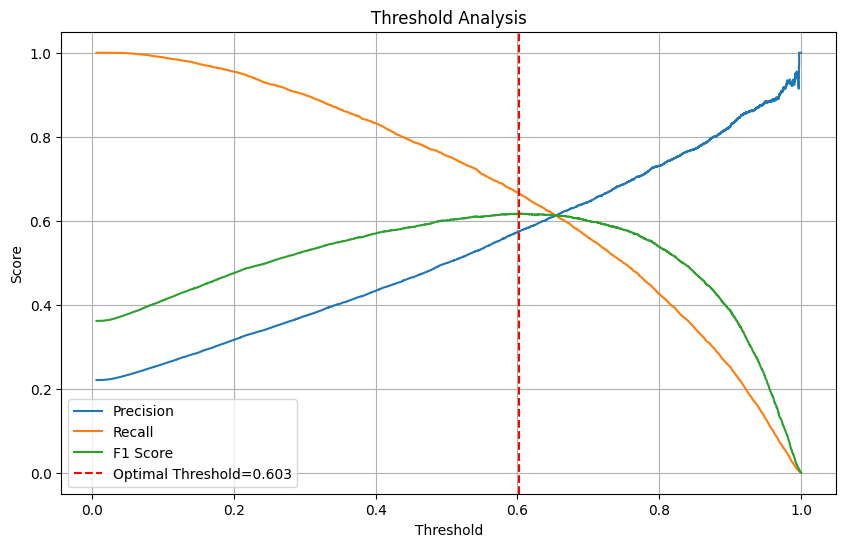

Logistic Regression Results:
C=1e-09: {'recall': 0.3130841121495327, 'f1': 0.39273153575615477, 'f2': 0.3407241659886086, 'roc_auc': 0.7766083557579635, 'brier': 0.2498905348143732}
C=1e-06: {'recall': 0.3582554517133956, 'f1': 0.4223670920943899, 'f2': 0.38141355178932707, 'roc_auc': 0.7891284101376916, 'brier': 0.2287569799178405}
C=0.0001: {'recall': 0.7185358255451714, 'f1': 0.5951490130305767, 'f2': 0.6635118807893677, 'roc_auc': 0.8368968983658601, 'brier': 0.171147548192397}
C=0.1: {'recall': 0.7551401869158878, 'f1': 0.6011532023064046, 'f2': 0.6849586029557208, 'roc_auc': 0.8524905698384329, 'brier': 0.1539692651094983}

KNN Results for different K values:


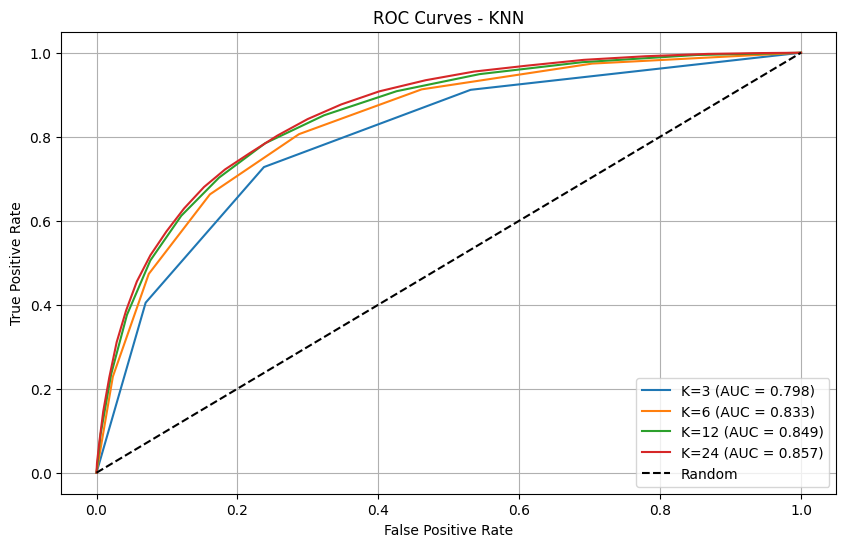

K=3: {'recall': 0.7277258566978193, 'f1': 0.567024698100613, 'f2': 0.6536276896387699, 'roc_auc': 0.7979621686046383, 'brier': 0.18334555509723943}
K=6: {'recall': 0.6627725856697819, 'f1': 0.5940663176265271, 'f2': 0.6334673217210064, 'roc_auc': 0.833310012130186, 'brier': 0.1603084849595918}
K=12: {'recall': 0.7026479750778816, 'f1': 0.6065210084033613, 'f2': 0.6607587520140619, 'roc_auc': 0.8491724459555421, 'brier': 0.15107985967887316}
K=24: {'recall': 0.7221183800623053, 'f1': 0.6102810504837755, 'f2': 0.6728006269410501, 'roc_auc': 0.8568821457897756, 'brier': 0.1477699577585285}

Naive Bayes Results:


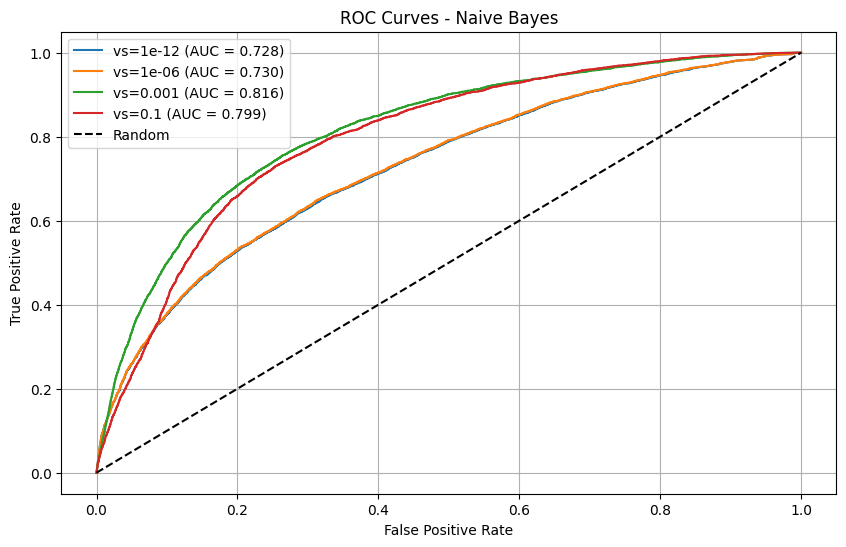

var_smoothing=1e-12: {'recall': 0.7200934579439252, 'f1': 0.4537023406447814, 'f2': 0.5831378188148036, 'roc_auc': 0.728406702546075, 'brier': 0.352589401785588}
var_smoothing=1e-06: {'recall': 0.7197819314641745, 'f1': 0.45585478938541973, 'f2': 0.5844336520463399, 'roc_auc': 0.7301694371802566, 'brier': 0.34901454942908333}
var_smoothing=0.001: {'recall': 0.579595015576324, 'f1': 0.5653726354174581, 'f2': 0.5738210529562348, 'roc_auc': 0.8159852883708507, 'brier': 0.1508886575339084}
var_smoothing=0.1: {'recall': 0.1763239875389408, 'f1': 0.27254123028770916, 'f2': 0.20531795262451483, 'roc_auc': 0.7986690906427734, 'brier': 0.16872318816931148}

SVM Results for different C values:


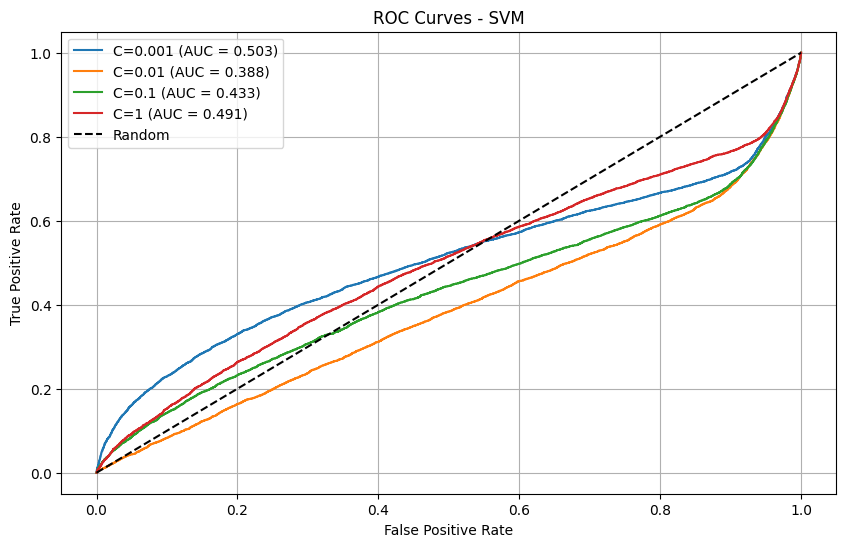

C=0.001: {'recall': 0.9993769470404984, 'f1': 0.3613833502309339, 'f2': 0.5857434998539293, 'roc_auc': 0.5027131603998619, 'brier': 0.2780689794490637}
C=0.01: {'recall': 0.9995327102803738, 'f1': 0.3614294967473035, 'f2': 0.5858240975734448, 'roc_auc': 0.38794883611772485, 'brier': 0.31556229682634734}
C=0.1: {'recall': 0.9956386292834891, 'f1': 0.3603562972150186, 'f2': 0.5838935983630518, 'roc_auc': 0.433065817938385, 'brier': 0.3789634277362297}
C=1: {'recall': 0.7922118380062305, 'f1': 0.3105006105006105, 'f2': 0.4888504421376394, 'roc_auc': 0.49082396363032776, 'brier': 0.3098131775010791}


In [ ]:
run_all_models(X_undersampled, X_test, y_undersampled, y_test)

### Conclusions about the oversampling:

**Logistic Regression:**  
- Slightly better than the undersampled version, but not a significant difference.  
- Still, this is clearly the best model overall and likely better than the others.

**KNN:**  
- Recall is noticeably better, especially with lower `K` values.  
- However, the F1 score remains somewhat inconsistent and interesting to analyze.

**Naive Bayes:**  
- The ROC-AUC score is similar to the undersampled version, but the trend differs for various values.  
- If we combine results and pick the best one, it likely comes from the oversampled version.

**SVM:**  
- Similar to other versions, a `C` value of **1** remains the best choice.

In [ ]:



def apply_over_sampling(X, y):
    sampler = SMOTE(random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

X_oversampled, y_oversampled = apply_over_sampling(X_train, y_train)


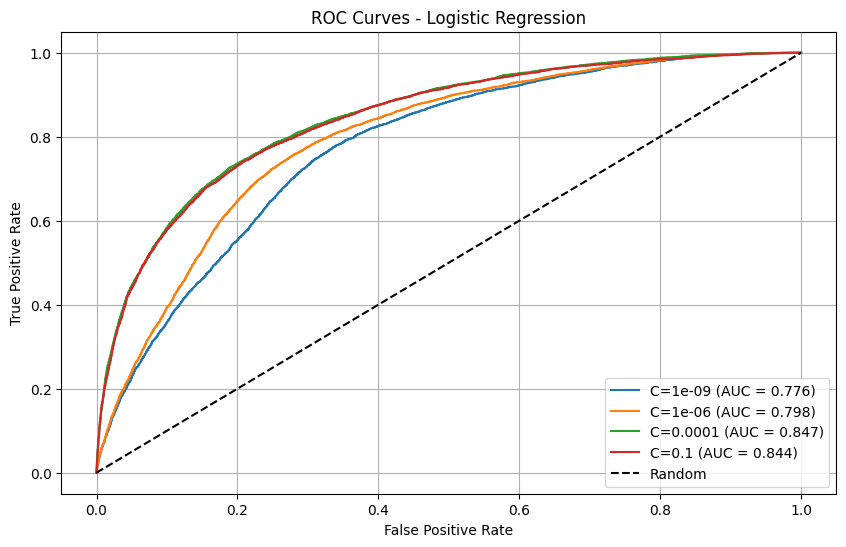

Plotting Top Features...


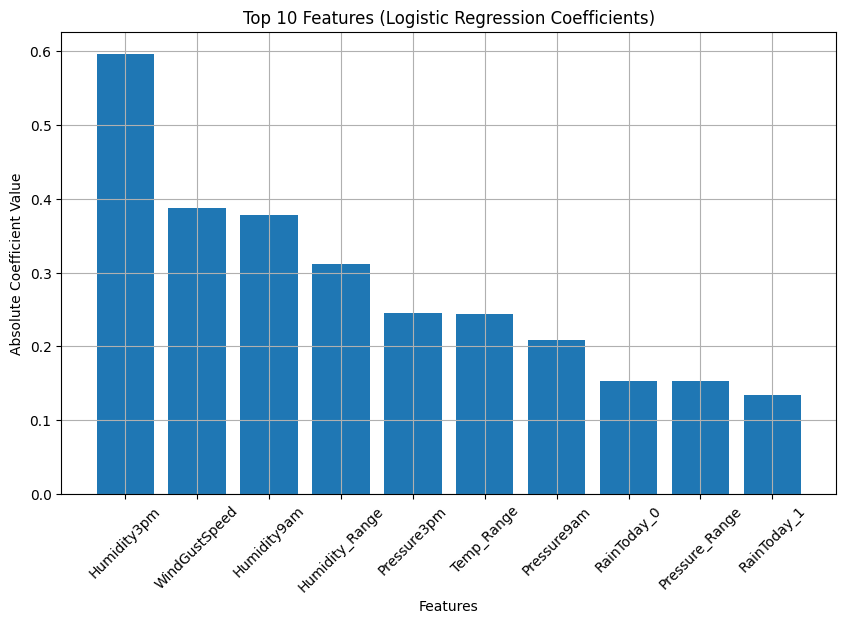

Performing Threshold Analysis...
Optimal Threshold: 0.558


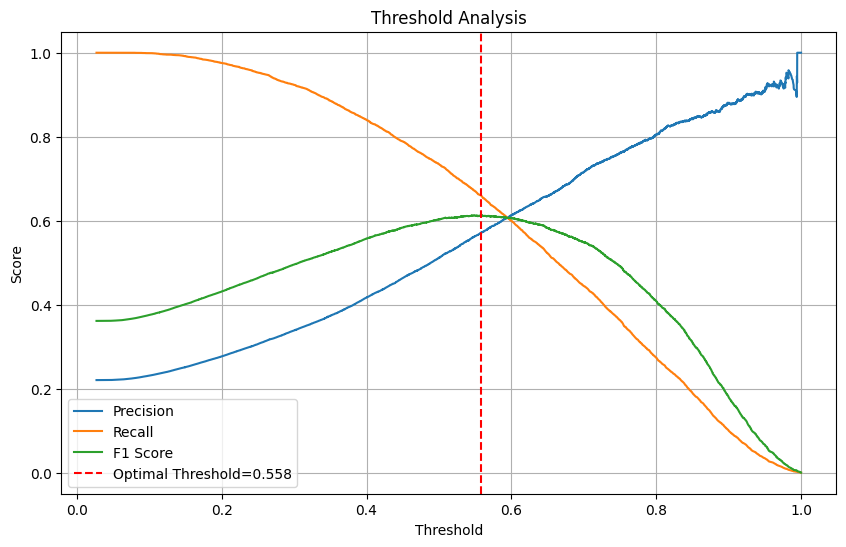

Logistic Regression Results:
C=1e-09: {'recall': 0.3130841121495327, 'f1': 0.3926164664518019, 'f2': 0.3406895148988101, 'roc_auc': 0.7763663634944609, 'brier': 0.2496154109254073}
C=1e-06: {'recall': 0.40031152647975077, 'f1': 0.4531429075200564, 'f2': 0.4198934744959644, 'roc_auc': 0.7978736449037831, 'brier': 0.21883797824263182}
C=0.0001: {'recall': 0.7347352024922118, 'f1': 0.6034670248832598, 'f2': 0.6759235376723125, 'roc_auc': 0.8471265831898817, 'brier': 0.15558123825785572}
C=0.1: {'recall': 0.6911214953271028, 'f1': 0.6043724034597834, 'f2': 0.6535957340246884, 'roc_auc': 0.8440782556385853, 'brier': 0.14214275917359076}

KNN Results for different K values:


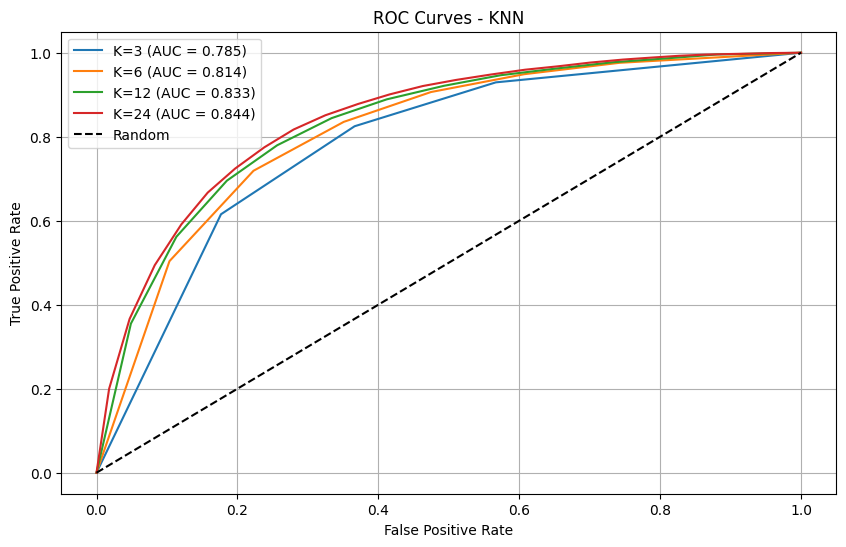

K=3: {'recall': 0.8249221183800624, 'f1': 0.5290445032715648, 'f2': 0.6741172577072885, 'roc_auc': 0.7847070755204383, 'brier': 0.2516995890431887}
K=6: {'recall': 0.8353582554517134, 'f1': 0.5433912558893561, 'f2': 0.6875817328649453, 'roc_auc': 0.81388651749341, 'brier': 0.2498539117283102}
K=12: {'recall': 0.8889408099688474, 'f1': 0.5317741334327246, 'f2': 0.7006924663589038, 'roc_auc': 0.8332383240776773, 'brier': 0.25411529706524894}
K=24: {'recall': 0.9207165109034268, 'f1': 0.517759383348662, 'f2': 0.7021357470363243, 'roc_auc': 0.8440750266017671, 'brier': 0.26137608706860993}

Naive Bayes Results:


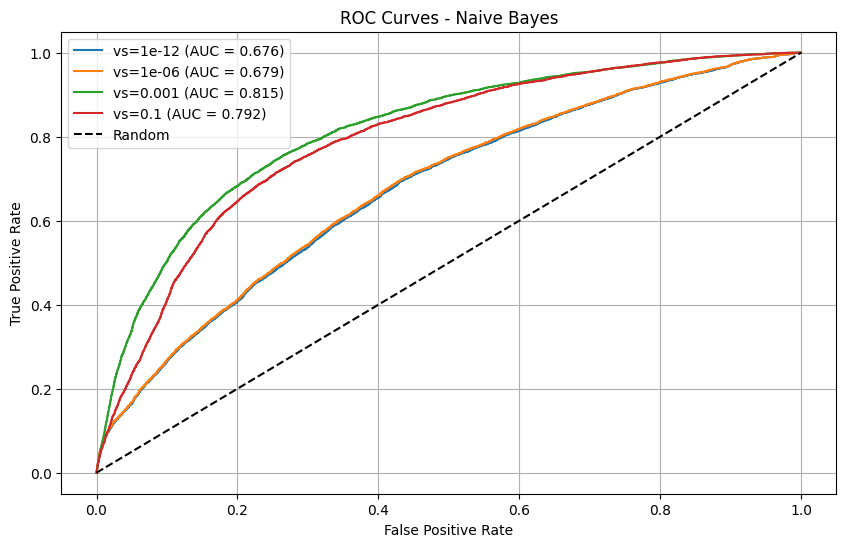

var_smoothing=1e-12: {'recall': 0.4532710280373832, 'f1': 0.4015177647464643, 'f2': 0.4310472522589246, 'roc_auc': 0.6755991477816106, 'brier': 0.28738462483065635}
var_smoothing=1e-06: {'recall': 0.46090342679127727, 'f1': 0.40550911333424694, 'f2': 0.43702368996278135, 'roc_auc': 0.6785490240614083, 'brier': 0.2868311811474065}
var_smoothing=0.001: {'recall': 0.8267912772585669, 'f1': 0.5346494762288477, 'f2': 0.6784947336128438, 'roc_auc': 0.8153996510166932, 'brier': 0.2343336009898915}
var_smoothing=0.1: {'recall': 0.17881619937694704, 'f1': 0.2753988245172124, 'f2': 0.20799362249519876, 'roc_auc': 0.7921724746733589, 'brier': 0.17048108490278863}

SVM Results for different C values:


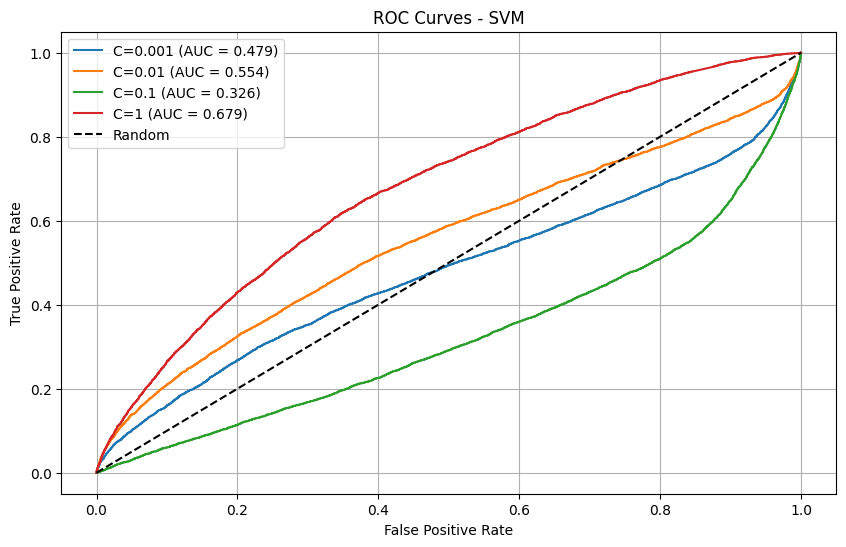

C=0.001: {'recall': 1.0, 'f1': 0.361567920702861, 'f2': 0.5860658730738334, 'roc_auc': 0.4792179190382912, 'brier': 0.2633009555395252}
C=0.01: {'recall': 0.9998442367601246, 'f1': 0.3615217819830475, 'f2': 0.5859852841832357, 'roc_auc': 0.5542386054848008, 'brier': 0.31031346935149073}
C=0.1: {'recall': 0.9894080996884735, 'f1': 0.35858642881336794, 'f2': 0.5807489760093622, 'roc_auc': 0.32628010698966925, 'brier': 0.5850310902270973}
C=1: {'recall': 0.787227414330218, 'f1': 0.4166872784236128, 'f2': 0.5806792591571304, 'roc_auc': 0.6791750896435582, 'brier': 0.30227251617719264}


In [ ]:
run_all_models(X_oversampled, X_test, y_oversampled, y_test)

### Comparing all models:

**Logistic Regression:**  
- Simple to implement, computationally efficient, and performs well overall.  
- A reliable choice for this dataset and scenario.  

**Naive Bayes:**  
- Uncertain if it’s a good fit here, but likely works better for area-specific problems.  

**KNN:**  
- Performs well except for unbalanced data, where it struggles.  
- Works better with appropriate balancing techniques.  

**SVM:**  
- The most advanced model but gave poor results due to computational limitations.  
- With proper tuning and parameter optimization, SVM could likely yield excellent results.

In [ ]:
#DRAFT

In [ ]:
url = "https://miro.medium.com/v2/resize:fit:1400/0*3v1BHxRj_JJ6Mzuz.png"

display.Image(url=url)

In [ ]:

url = "https://automaticaddison.com/wp-content/uploads/2019/07/five-fold-stratified-cross-validation.png"

display.Image(url=url)

This part will take a long time. If I can find a properly running GPU on Colab without issues, it might help with models like SVM. But for now, I only have one chance to run it.  

Additionally, I need to manage functions better for reuse. However, this current implementation is acceptable for now.

I added this part later, so I couldn't fully determine its complexity.

In [ ]:

X_trains, X_tests, y_trains, y_tests = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 116368 samples
Test set size: 29092 samples


In [ ]:



class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.6400105597782446, 1: 2.2855796048238206}


In [ ]:
def train_logistic_regression_weighted(X_train, X_test, y_train, y_test, feature_names, class_weight):
    C_values = [1e-9, 1e-6, 1e-4, 1e-1]
    results = {}
    plt.figure(figsize=(10, 6))
    best_model = None
    best_auc = -1
    for C in C_values:
        model = LogisticRegression(C=C, class_weight=class_weight, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[C] = evaluate_model(y_test, y_pred, y_prob)
        plot_roc_curve(y_test, y_prob, f'C={C}')

        if results[C]['roc_auc'] > best_auc:
            best_auc = results[C]['roc_auc']
            best_model = model

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Logistic Regression with Class Weighting')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Plotting Top Features...")
    plot_top_features(best_model, feature_names)

    print("Performing Threshold Analysis...")
    optimal_threshold = threshold_analysis(y_test, best_model.predict_proba(X_test)[:, 1])

    return results, optimal_threshold


In [ ]:
def train_svm_models_weighted(X_train, X_test, y_train, y_test, class_weight):
    C_values = [0.001, 0.01, 0.1, 1]
    results = {}
    plt.figure(figsize=(10, 6))
    for C in C_values:
        model = SVC(kernel='linear', C=C, probability=True, class_weight=class_weight,
                    random_state=42, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[C] = evaluate_model(y_test, y_pred, y_prob)
        plot_roc_curve(y_test, y_prob, f'C={C}')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - SVM with Class Weighting')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results


The weighted version has the best performance. Initially, I was surprised and couldn’t figure out why, but then I understood:  

For the other methods, we either reduce the data or create new data, which can alter the original distribution.  
However, weighting preserves the original structure and doesn’t introduce bias, making it a better approach.

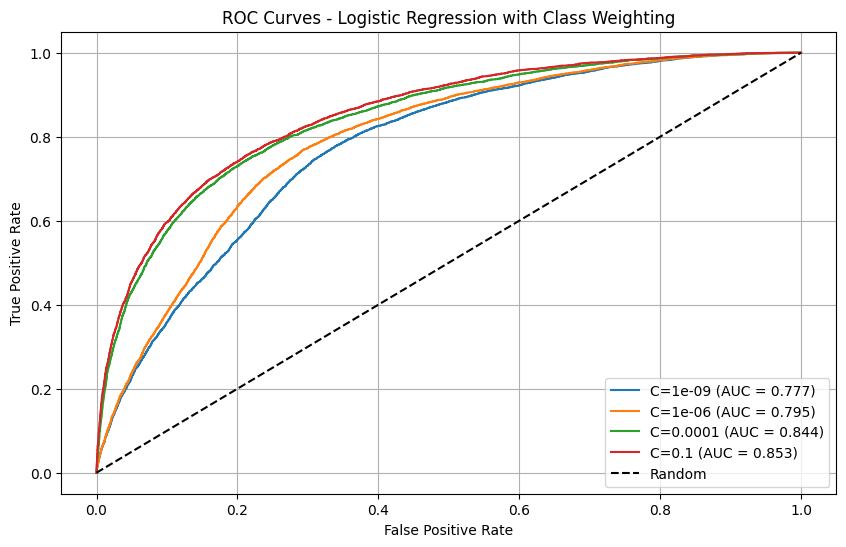

Plotting Top Features...


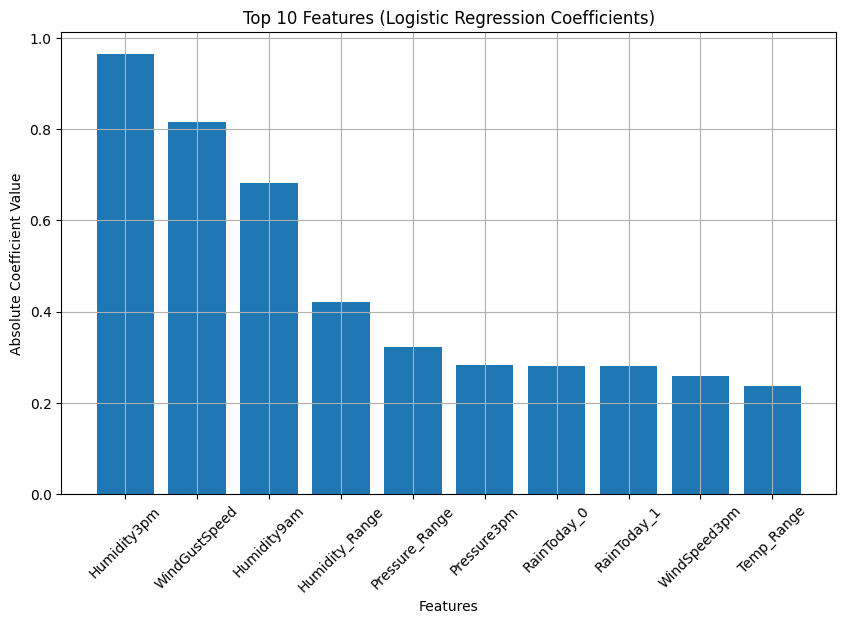

Performing Threshold Analysis...
Optimal Threshold: 0.602


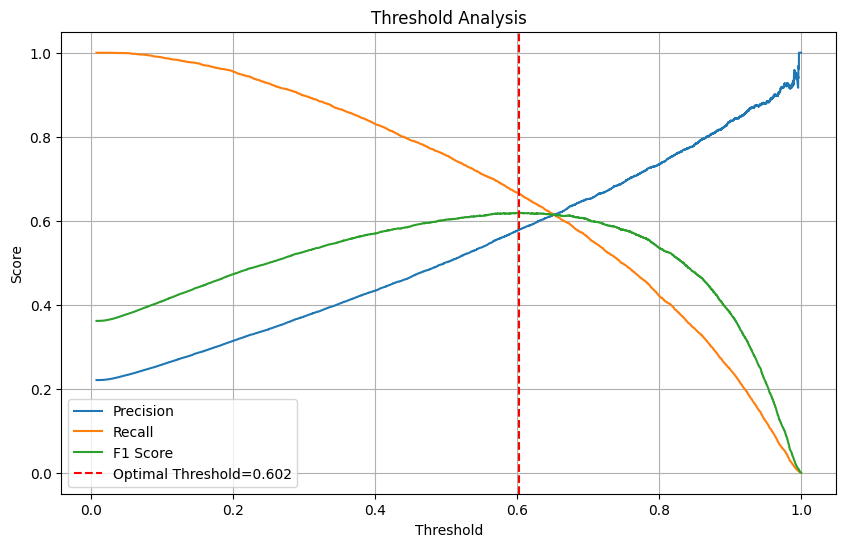

Weighted Logistic Regression Results:
C=1e-09: {'recall': 0.31588785046728973, 'f1': 0.3939393939393939, 'f2': 0.34307754770604953, 'roc_auc': 0.7765791913722335, 'brier': 0.2497579699211466}
C=1e-06: {'recall': 0.3828660436137072, 'f1': 0.44038340947773896, 'f2': 0.40397068007757286, 'roc_auc': 0.7945419247148005, 'brier': 0.22259870107961635}
C=0.0001: {'recall': 0.7390965732087228, 'f1': 0.5976070528967254, 'f2': 0.6751565167899829, 'roc_auc': 0.8439450132129438, 'brier': 0.16241005691927166}
C=0.1: {'recall': 0.7557632398753894, 'f1': 0.6027329192546584, 'f2': 0.6860859728506787, 'roc_auc': 0.8528633861851087, 'brier': 0.15333234456863504}


In [ ]:

feature_names = X_train.columns.tolist()


weighted_results, optimal_threshold = train_logistic_regression_weighted(
    X_train, X_test, y_train, y_test, feature_names=feature_names, class_weight=class_weight_dict
)


print("Weighted Logistic Regression Results:")
for C, metrics in weighted_results.items():
    print(f"C={C}: {metrics}")


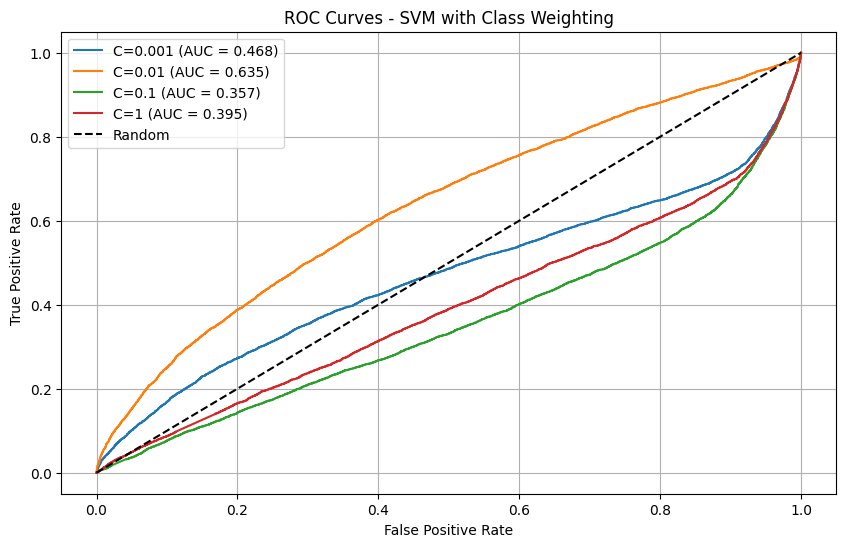


Weighted SVM Results for different C values:
C=0.001: {'recall': 0.9998442367601246, 'f1': 0.3615217819830475, 'f2': 0.5859852841832357, 'roc_auc': 0.468122962271659, 'brier': 0.3808279678680751}
C=0.01: {'recall': 0.9998442367601246, 'f1': 0.3615217819830475, 'f2': 0.5859852841832357, 'roc_auc': 0.6345366888659513, 'brier': 0.38934999379483637}
C=0.1: {'recall': 0.84797507788162, 'f1': 0.3212841925108442, 'f2': 0.5121451015070838, 'roc_auc': 0.3567574500062657, 'brier': 0.23334770648111072}
C=1: {'recall': 0.8169781931464174, 'f1': 0.3137055533957355, 'f2': 0.49763752632877284, 'roc_auc': 0.394582153704351, 'brier': 0.2433583169882785}


In [ ]:

weighted_svm_results = train_svm_models_weighted(
    X_train, X_test, y_train, y_test, class_weight=class_weight_dict
)


print("\nWeighted SVM Results for different C values:")
for C, metrics in weighted_svm_results.items():
    print(f"C={C}: {metrics}")


K-fold cross-validation is an excellent approach, especially when you have a limited dataset, as it allows the model to see all the data rather than just 80%.  

However, K-fold is computationally intensive and not very friendly to your CPU. For linear models, a GPU won’t help much, but running parallel models might solve this issue.  

I’ll consider addressing this in future assignments to optimize the process.

I understand the concept of K-Fold, but I couldn't implement it properly. I tried, but the results seemed a bit meaningless. However, I kept it, and if I have time, I’ll try to fix it.

In [ ]:

X = df_scaled.drop(columns=['RainTomorrow'])
y = df_scaled['RainTomorrow']


In [ ]:
def train_logistic_regression_weighted(X_train, X_test, y_train, y_test, feature_names, class_weight, plot=True):
    C_values = [1e-9, 1e-6, 1e-4, 1e-1]
    results = {}
    if plot:
        plt.figure(figsize=(10, 6))
    best_model = None
    best_auc = -1
    for C in C_values:
        model = LogisticRegression(C=C, class_weight=class_weight, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        results[C] = evaluate_model(y_test, y_pred, y_prob)
        if plot:
            plot_roc_curve(y_test, y_prob, f'C={C}')
        if results[C]['roc_auc'] > best_auc:
            best_auc = results[C]['roc_auc']
            best_model = model
    if plot:
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves - Logistic Regression with Class Weighting')
        plt.legend()
        plt.grid(True)
        plt.show()
        print("Plotting Top Features...")
        plot_top_features(best_model, feature_names)
        print("Performing Threshold Analysis...")
        optimal_threshold = threshold_analysis(y_test, best_model.predict_proba(X_test)[:, 1])
    else:
        optimal_threshold = None
    return results, optimal_threshold


In [ ]:


def cross_validate_logistic_regression(X, y, feature_names, class_weight, C_values, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


    metrics_list = []

    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]


        results, _ = train_logistic_regression_weighted(
            X_train_fold, X_test_fold, y_train_fold, y_test_fold,
            feature_names=feature_names, class_weight=class_weight, plot=False
        )


        metrics_list.append(results)


    C_values = list(metrics_list[0].keys())
    average_metrics = {}

    for C in C_values:
        avg_metrics = {'recall': 0, 'f1': 0, 'f2': 0, 'roc_auc': 0, 'brier': 0}
        for fold_metrics in metrics_list:
            fold_result = fold_metrics[C]
            for metric in avg_metrics:
                avg_metrics[metric] += fold_result[metric]
        for metric in avg_metrics:
            avg_metrics[metric] /= n_splits
        average_metrics[C] = avg_metrics

    return average_metrics


In [ ]:
from sklearn.model_selection import StratifiedKFold

def cross_validate_logistic_regression(X, y, feature_names, class_weight, C_values, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


    metrics_list = []

    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        results, _ = train_logistic_regression_weighted(
            X_train_fold, X_test_fold, y_train_fold, y_test_fold,
            feature_names=feature_names, class_weight=class_weight, plot=False
        )


        metrics_list.append(results)


    C_values = list(metrics_list[0].keys())
    average_metrics = {}

    for C in C_values:
        avg_metrics = {'recall': 0, 'f1': 0, 'f2': 0, 'roc_auc': 0, 'brier': 0}
        for fold_metrics in metrics_list:
            fold_result = fold_metrics[C]
            for metric in avg_metrics:
                avg_metrics[metric] += fold_result[metric]
        for metric in avg_metrics:
            avg_metrics[metric] /= n_splits
        average_metrics[C] = avg_metrics

    return average_metrics


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))


feature_names = X.columns.tolist()


C_values = [1e-9, 1e-6, 1e-4, 1e-1]


In [ ]:

average_metrics = cross_validate_logistic_regression(
    X, y, feature_names, class_weight_dict, C_values, n_splits=5
)

print("Cross-Validation Results (Average over 5 folds):")
for C, metrics in average_metrics.items():
    print(f"C={C}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")


Cross-Validation Results (Average over 5 folds):
C=1e-09:
  recall: 0.3243
  f1: 0.4003
  f2: 0.3510
  roc_auc: 0.7776
  brier: 0.2498
C=1e-06:
  recall: 0.3866
  f1: 0.4435
  f2: 0.4076
  roc_auc: 0.7956
  brier: 0.2229
C=0.0001:
  recall: 0.7401
  f1: 0.5958
  f2: 0.6747
  roc_auc: 0.8450
  brier: 0.1626
C=0.1:
  recall: 0.7562
  f1: 0.6009
  f2: 0.6853
  roc_auc: 0.8532
  brier: 0.1539
